# Bank Transactions Data vs American Housing Data
## Fall 2024
### Nahyun Lee

### Find a dataset or datasets

In [ ]:
__author__ = 'Nahyun Lee'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_bank = pd.read_csv('https://raw.githubusercontent.com/nahniee/final_project_datasets/refs/heads/main/bank_transactions_data_2.csv')
df_house = pd.read_csv('https://raw.githubusercontent.com/nahniee/final_project_datasets/refs/heads/main/American_Housing_Data_20231209.csv')

Using the Bank transactions data and American housing data, I realized that various financial-related research opportunities could be explored across different states in the United States. My curiosity stemmed from understanding how factors such as age groups of homeowners, house prices, and average income levels in each state might relate to bank transactions. I attempted to analyze these datasets from various perspectives.

I sourced the 2023-updated “bank transactions data” and the recently updated (3 months ago) “American Housing Data” from Kaggle.
1. https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities
2. https://www.kaggle.com/datasets/waqi786/global-black-money-transactions-dataset

### Explore the datasets

In the following steps, I will use the Pandas library to explore and prepare the dataset for analysis. I will also use Markdown cells to document and explain my actions clearly.

First, I will investigate whether there are any data quality issues, such as missing values, noisy entries, or inconsistencies. Based on this assessment, I will determine the appropriate data cleaning and transformation techniques to ensure the dataset is ready for meaningful analysis.

Next, I will perform exploratory data analysis (EDA) using both summary statistics and visualizations to better understand the structure of the data. This includes:
* Analyzing distributions of key variables
* Identifying common trends or patterns
* Exploring relationships and correlations between variables

This process will help guide further analysis and ensure a solid foundation for any modeling or interpretation.

#### 1. Load and inspect the Datasets

Use pandas to load the datasets and check for missing or noisy data.

In [ ]:
# Inspect the first few rows of the bank transaction dataset
df_bank.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [ ]:
# Inspect the first few rows the american housing dataset
df_house.head()

Zip Code      Price  Beds  Baths  Living Space                Address  \
0     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
1     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
2     10014  1650000.0     1      1           718  140 CHARLES ST APT 4D   
3     10014   760000.0     3      2          1538            38 JONES ST   
4     10014  1100000.0     1      1           600   81 BEDFORD ST APT 3F   

       City     State  Zip Code Population  Zip Code Density    County  \
0  New York  New York                29563           20967.9  New York   
1  New York  New York                29563           20967.9  New York   
2  New York  New York                29815           23740.9  New York   
3  New York  New York                29815           23740.9  New York   
4  New York  New York                29815           23740.9  New York   

   Median Household Income  Latitude  Longitude  
0                 370046.0  40.72001  -74.00472  
1                 370046.0  40.72001  -74.00472  
2                 249880.0  40.73407  -74.00601  
3                 249880.0  40.73407  -74.00601  
4                 249880.0  40.73407  -74.00601

#### 2. Data Cleaning and Transformation

Handle Missing or Incorrect Mapping.

In [ ]:
# Check for missing data
df_bank.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [ ]:
# Check for missing data(I found 2 missing data in Median Household Income)
# The number of missing rows is small and won’t significantly affect this analysis, so I drop them
df_house = df_house.dropna(subset=['Median Household Income'])
df_house.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [ ]:
# Count duplicate rows
print(df_bank.duplicated().sum())
print(df_house.duplicated().sum())

0
962


In [ ]:
# Remove all duplicate rows
df_house = df_house.drop_duplicates()
df_house
print(df_house.duplicated().sum())

0


In [ ]:
# Ensure datasets have a common column for merging
df_bank.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [ ]:
# Ensure datasets have a common column for merging
df_house.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# Identify and inspect the unique values in the Location column
df_bank['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [ ]:
# Change from city to state
city_to_state = {
    'San Diego': 'California',
    'Houston': 'Texas',
    'Mesa': 'Arizona',
    'Raleigh': 'North Carolina',
    'Atlanta': 'Georgia',
    'Oklahoma City': 'Oklahoma',
    'Seattle': 'Washington',
    'Indianapolis': 'Indiana',
    'Detroit': 'Michigan',
    'Nashville': 'Tennessee',
    'Albuquerque': 'New Mexico',
    'Memphis': 'Tennessee',
    'Louisville': 'Kentucky',
    'Denver': 'Colorado',
    'Austin': 'Texas',
    'Columbus': 'Ohio',
    'Los Angeles': 'California',
    'Las Vegas': 'Nevada',
    'Fort Worth': 'Texas',
    'Miami': 'Florida',
    'Milwaukee': 'Wisconsin',
    'Baltimore': 'Maryland',
    'New York': 'New York',
    'San Francisco': 'California',
    'San Jose': 'California',
    'San Antonio': 'Texas',
    'Philadelphia': 'Pennsylvania',
    'Charlotte': 'North Carolina',
    'Tucson': 'Arizona',
    'Chicago': 'Illinois',
    'Sacramento': 'California',
    'Kansas City': 'Missouri',
    'Omaha': 'Nebraska',
    'Virginia Beach': 'Virginia',
    'Dallas': 'Texas',
    'Boston': 'Massachusetts',
    'Jacksonville': 'Florida',
    'Phoenix': 'Arizona',
    'Washington': 'District of Columbia',
    'El Paso': 'Texas',
    'Colorado Springs': 'Colorado',
    'Fresno': 'California',
    'Portland': 'Oregon'
}

# Replace city names with their corresponding state names
df_bank['State'] = df_bank['Location'].map(city_to_state)

# Remove rows where the State is 'Massachusetts' for making the same dataset of df_income
df_bank = df_bank[df_bank['State'] != 'Massachusetts']
df_bank['State'].unique()

array(['California', 'Texas', 'Arizona', 'North Carolina', 'Georgia',
       'Oklahoma', 'Washington', 'Indiana', 'Michigan', 'Tennessee',
       'New Mexico', 'Kentucky', 'Colorado', 'Ohio', 'Nevada', 'Florida',
       'Wisconsin', 'Maryland', 'New York', 'Pennsylvania', 'Illinois',
       'Missouri', 'Nebraska', 'Virginia', 'District of Columbia',
       'Oregon'], dtype=object)

In [ ]:
# Remove rows where State is 'Minnesota', 'Kansas', or 'Louisiana'
df_house = df_house[
    (df_house['State'] != 'Minnesota') &
    (df_house['State'] != 'Kansas') &
    (df_house['State'] != 'Louisiana')
]

df_house['State'].unique()

array(['New York', 'Pennsylvania', 'District of Columbia', 'Maryland',
       'Virginia', 'North Carolina', 'Georgia', 'Florida', 'Tennessee',
       'Kentucky', 'Ohio', 'Indiana', 'Michigan', 'Wisconsin', 'Illinois',
       'Missouri', 'Nebraska', 'Oklahoma', 'Texas', 'Colorado', 'Arizona',
       'New Mexico', 'Nevada', 'California', 'Oregon', 'Washington'],
      dtype=object)

In [ ]:
# Sets the State column as the index of the DataFrame while retaining it as a regular column
df_bank = df_bank.set_index(keys = 'State', drop = False)
# Include only rows corresponding to the listed states
df_bank_state = df_bank.loc[['California', 'Texas', 'Arizona', 'North Carolina', 'Georgia',
       'Oklahoma', 'Washington', 'Indiana', 'Michigan', 'Tennessee',
       'New Mexico', 'Kentucky', 'Colorado', 'Ohio', 'Nevada', 'Florida',
       'Wisconsin', 'Maryland', 'New York', 'Pennsylvania', 'Illinois',
       'Missouri', 'Nebraska', 'Virginia', 'District of Columbia',
       'Oregon']]

In [ ]:
# # Sets the State column as the index of the DataFrame while retaining it as a regular column
df_house = df_house.set_index(keys = 'State', drop = False)
# Include only rows corresponding to the listed states
df_house_state = df_house.loc[['New York', 'Pennsylvania', 'District of Columbia', 'Maryland',
       'Virginia', 'North Carolina', 'Georgia', 'Florida', 'Tennessee',
       'Kentucky', 'Ohio', 'Indiana', 'Michigan', 'Wisconsin', 'Illinois',
       'Missouri', 'Nebraska', 'Oklahoma', 'Texas', 'Colorado', 'Arizona',
       'New Mexico', 'Nevada', 'California', 'Oregon', 'Washington']]

In [ ]:
df_bank_state

TransactionID AccountID  TransactionAmount      TransactionDate  \
State                                                                        
California      TX000001   AC00128              14.09  2023-04-11 16:29:14   
California      TX000021   AC00002              59.32  2023-02-28 16:36:58   
California      TX000034   AC00359             877.81  2023-03-13 17:23:24   
California      TX000035   AC00365             255.26  2023-10-27 16:42:49   
California      TX000038   AC00202             649.28  2023-03-02 17:53:32   
...                  ...       ...                ...                  ...   
Oregon          TX002044   AC00032             248.76  2023-03-20 18:51:53   
Oregon          TX002066   AC00483             604.50  2023-08-08 18:39:24   
Oregon          TX002101   AC00394             139.52  2023-09-22 18:02:42   
Oregon          TX002189   AC00115              85.01  2023-01-23 18:35:43   
Oregon          TX002202   AC00385            1431.54  2023-12-11 16:23:59   

           TransactionType       Location DeviceID      IP Address MerchantID  \
State                                                                           
California           Debit      San Diego  D000380  162.198.218.92       M015   
California           Debit    Los Angeles  D000152   116.44.12.250       M040   
California           Debit    Los Angeles  D000111  134.140.85.231       M094   
California          Credit  San Francisco  D000357   92.214.76.157       M002   
California           Debit       San Jose  D000448   73.108.76.238       M074   
...                    ...            ...      ...             ...        ...   
Oregon               Debit       Portland  D000390  149.46.124.220       M070   
Oregon               Debit       Portland  D000501  31.127.129.152       M073   
Oregon               Debit       Portland  D000504  216.79.134.201       M025   
Oregon              Credit       Portland  D000185  218.54.207.160       M014   
Oregon               Debit       Portland  D000490  68.254.244.208       M075   

           Channel  CustomerAge CustomerOccupation  TransactionDuration  \
State                                                                     
California     ATM           70             Doctor                   81   
California  Branch           71            Retired                   38   
California  Online           22            Student                  150   
California  Branch           45             Doctor                   50   
California     ATM           75            Retired                  137   
...            ...          ...                ...                  ...   
Oregon      Branch           21            Student                  117   
Oregon         ATM           28            Student                   80   
Oregon      Branch           23            Student                   31   
Oregon         ATM           25            Student                  157   
Oregon      Online           20            Student                   84   

            LoginAttempts  AccountBalance PreviousTransactionDate       State  
State                                                                          
California              1         5112.21     2024-11-04 08:08:08  California  
California              1         5750.89     2024-11-04 08:09:24  California  
California              1          399.00     2024-11-04 08:07:50  California  
California              1        14815.87     2024-11-04 08:10:51  California  
California              1         4875.86     2024-11-04 08:11:15  California  
...                   ...             ...                     ...         ...  
Oregon                  1         6178.77     2024-11-04 08:09:07      Oregon  
Oregon                  1          709.42     2024-11-04 08:06:32      Oregon  
Oregon                  1         1570.22     2024-11-04 08:08:00      Oregon  
Oregon                  1         1299.40     2024-11-04 08:08:58      Oregon  
Oregon

In [ ]:
df_house_state

Zip Code      Price  Beds  Baths  Living Space  \
State                                                        
New York       10013  3999000.0     2      3          1967   
New York       10014  1650000.0     1      1           718   
New York       10014   760000.0     3      2          1538   
New York       10014  1100000.0     1      1           600   
New York       10017   764900.0     1      1           643   
...              ...        ...   ...    ...           ...   
Washington     98199  2495000.0     4      4          3380   
Washington     98199  2295000.0     4      4          2878   
Washington     98199   950000.0     3      2          1380   
Washington     98199   425000.0     2      1           856   
Washington     98199  1150000.0     3      3          2840   

                           Address      City       State  Zip Code Population  \
State                                                                           
New York         74 GRAND ST APT 3  New York    New York                29563   
New York     140 CHARLES ST APT 4D  New York    New York                29815   
New York               38 JONES ST  New York    New York                29815   
New York      81 BEDFORD ST APT 3F  New York    New York                29815   
New York     145 E 48TH ST APT 11E  New York    New York                15514   
...                            ...       ...         ...                  ...   
Washington         2626 27TH AVE W   Seattle  Washington                22890   
Washington         3215 32ND AVE W   Seattle  Washington                22890   
Washington         3257 22ND AVE W   Seattle  Washington                22890   
Washington  3711 26TH PL W APT 102   Seattle  Washington                22890   
Washington         2911 25TH AVE W   Seattle  Washington                22890   

            Zip Code Density    County  Median Household Income  Latitude  \
State                                                                       
New York             20967.9  New York                 370046.0  40.72001   
New York             23740.9  New York                 249880.0  40.73407   
New York             23740.9  New York                 249880.0  40.73407   
New York             23740.9  New York                 249880.0  40.73407   
New York             20107.7  New York                 188289.0  40.75235   
...                      ...       ...                      ...       ...   
Washington            2086.8      King                 205611.0  47.65139   
Washington            2086.8      King                 205611.0  47.65139   
Washington            2086.8      King                 205611.0  47.65139   
Washington            2086.8      King                 205611.0  47.65139   
Washington            2086.8      King                 205611.0  47.65139   

            Longitude  
State                  
New York    -74.00472  
New York    -74.00601  
New York    -74.00601  
New York    -74.00601  
New York    -73.97260  
...               ...  
Washington -122.40223  
Washington -122.40223  
Washington -122.40223  
Washington -122.40223  
Washington -122.40223  

[36512 rows x 14 columns]

In [ ]:
# Map CustomerOccupation to numeric values
occupation_mapping = {'Student': 1, 'Doctor': 2, 'Engineer': 3, 'Retired': 4}
df_bank_state['CustomerOccupationNumeric'] = df_bank_state['CustomerOccupation'].map(occupation_mapping)

# Filtered the data
df_bank_filtered = df_bank_state[['State', 'TransactionAmount', 'CustomerAge', 'CustomerOccupationNumeric', 'AccountBalance']]
df_bank_filtered

State  TransactionAmount  CustomerAge  \
State                                                    
California  California              14.09           70   
California  California              59.32           71   
California  California             877.81           22   
California  California             255.26           45   
California  California             649.28           75   
...                ...                ...          ...   
Oregon          Oregon             248.76           21   
Oregon          Oregon             604.50           28   
Oregon          Oregon             139.52           23   
Oregon          Oregon              85.01           25   
Oregon          Oregon            1431.54           20   

            CustomerOccupationNumeric  AccountBalance  
State                                                  
California                          2         5112.21  
California                          4         5750.89  
California                          1          399.00  
California                          2        14815.87  
California                          4         4875.86  
...                               ...             ...  
Oregon                              1         6178.77  
Oregon                              1          709.42  
Oregon                              1         1570.22  
Oregon                              1         1299.40  
Oregon                              1         1171.98  

[2451 rows x 5 columns]

#### 3. Visualizing

Explores relationships and correlations between variables while identifying differences by state.

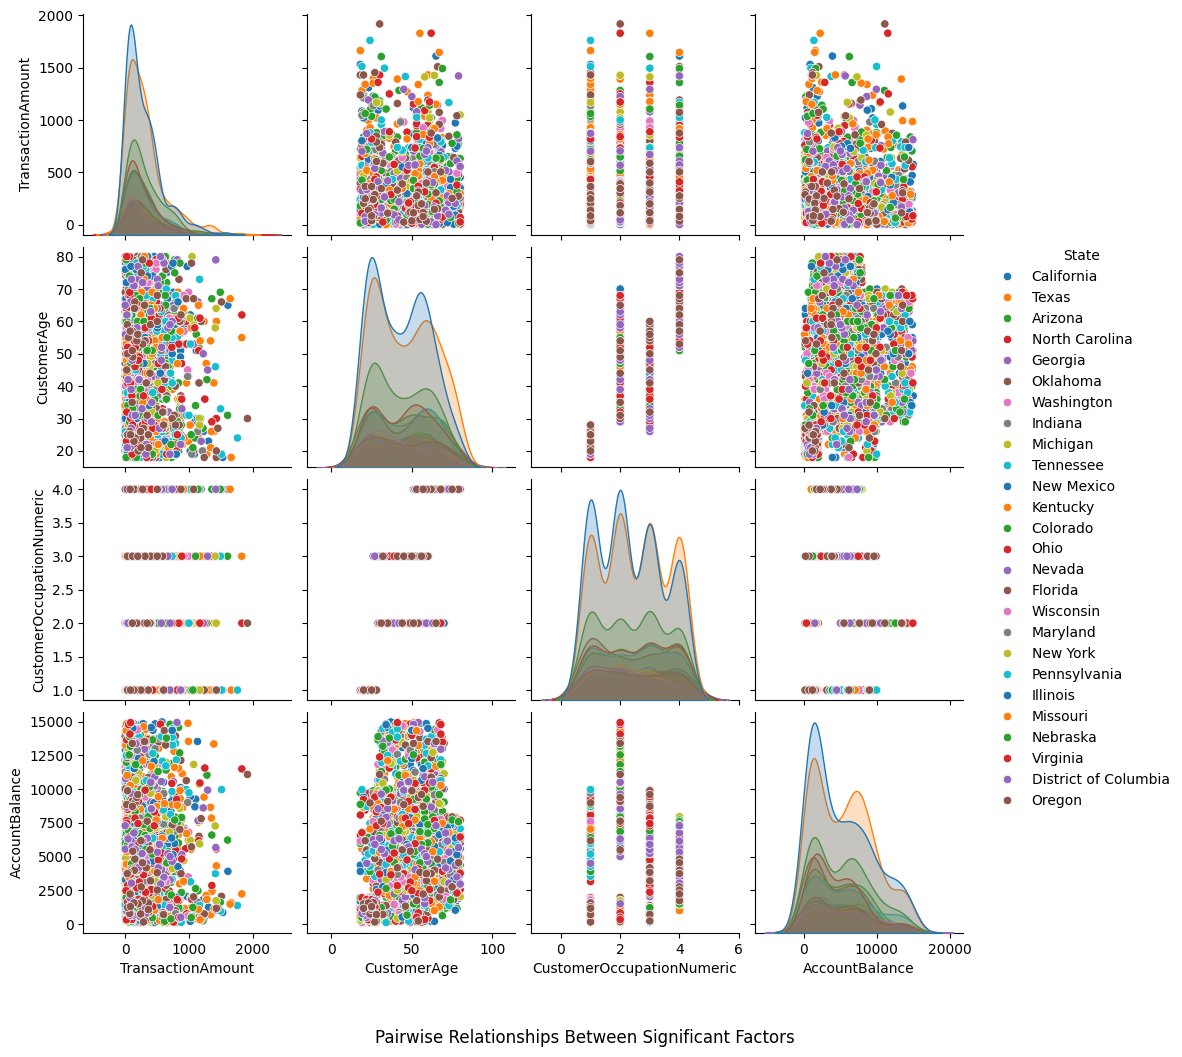

In [ ]:
# Create pairplot
sns.pairplot(df_bank_filtered, hue='State', palette='tab10', diag_kind='kde')
plt.figtext(0.5, -0.05, 'Pairwise Relationships Between Significant Factors', ha='center', fontsize=12)
plt.show()

Focus on individual variable distributions to understand data trends.

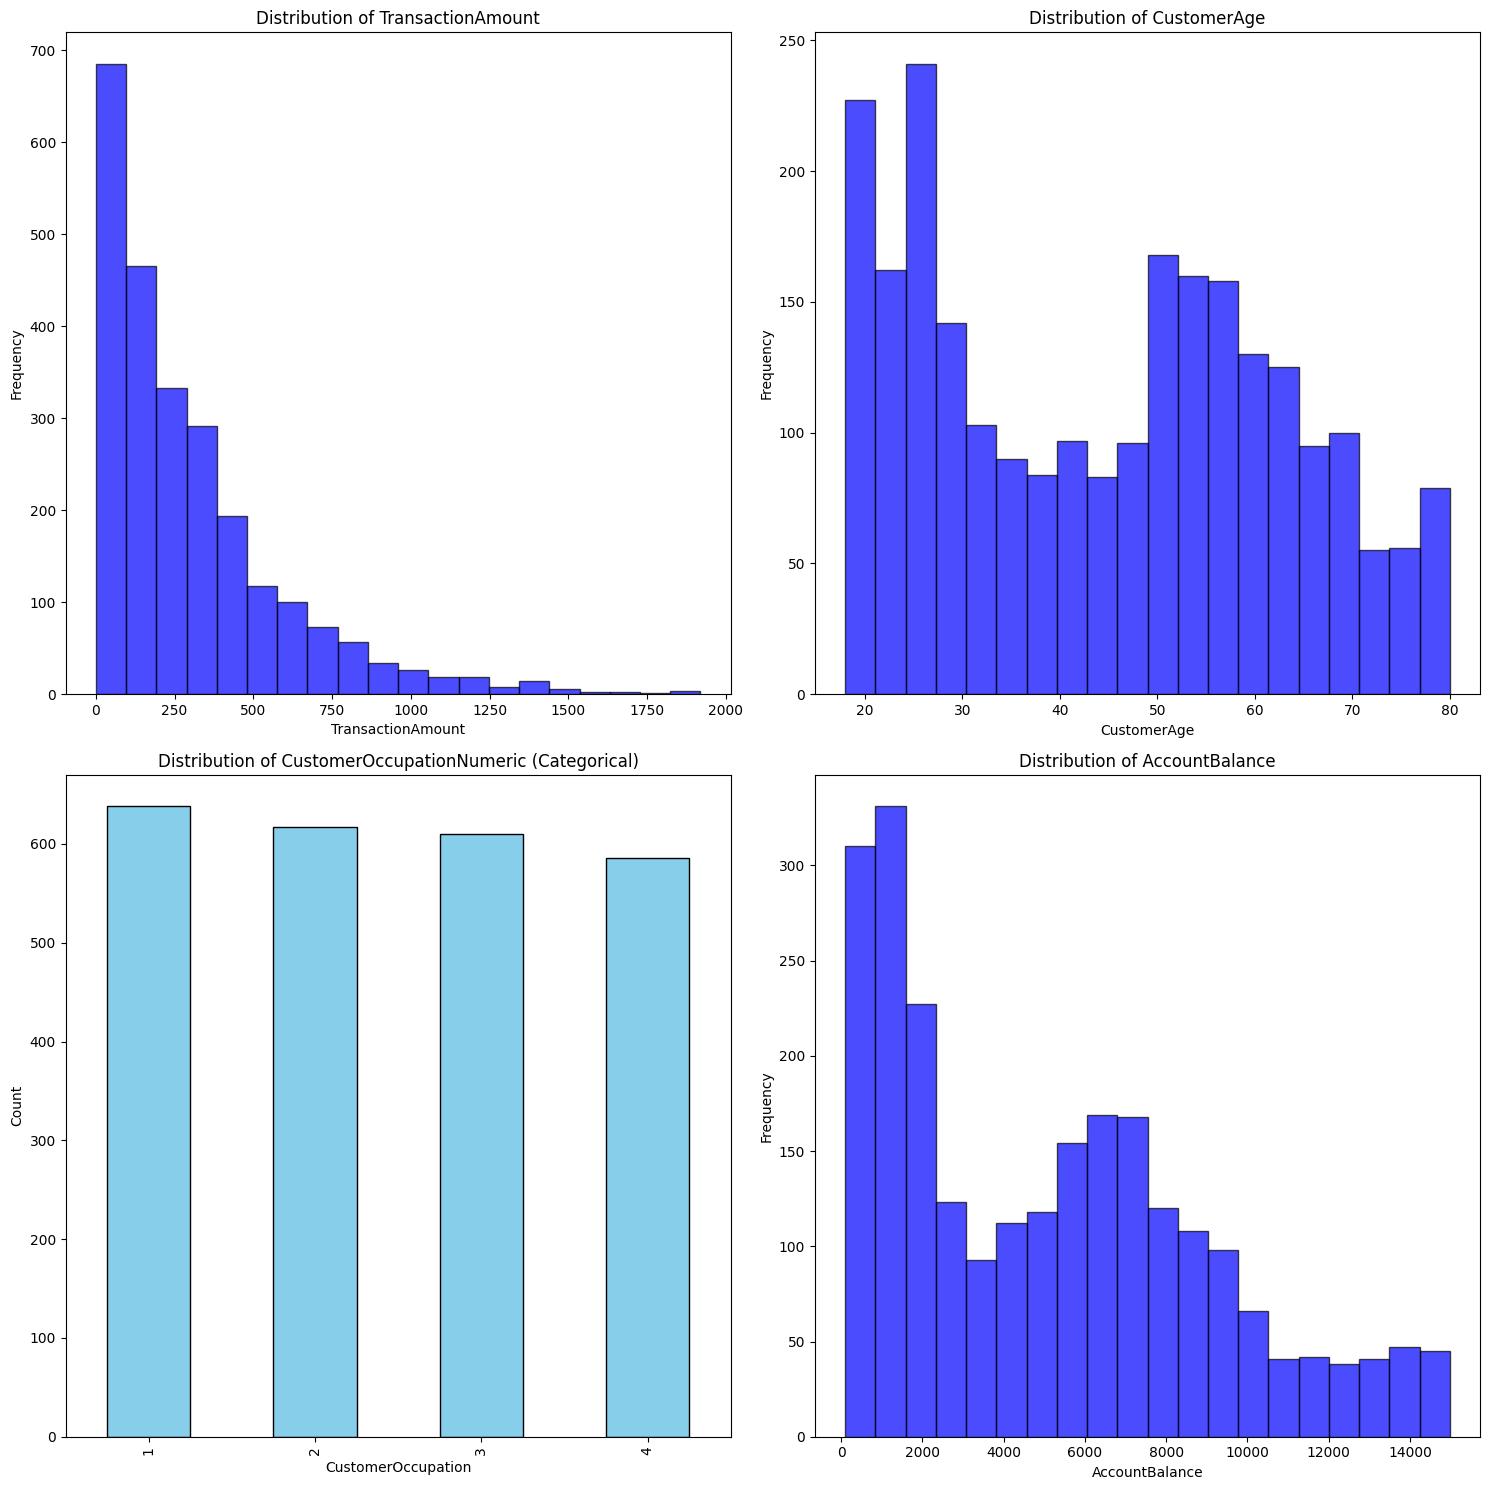

In [ ]:
# Create histograms for each column
fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(df_bank_filtered.columns[1:]):  # Skip 'State'
    # Adjust rows/columns based on number of plots
    plt.subplot(2, 2, i + 1)
    # Handling for categorical data
    if col == 'CustomerOccupationNumeric':
        df_bank_filtered[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col} (Categorical)')
        plt.ylabel('Count')
        plt.xlabel('CustomerOccupation')
    # Numeric data
    else:
        plt.hist(df_bank_filtered[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Summarize state-wise differences in numeric variables while identifying potential outliers.

<ipython-input-21-deeb66aea07f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bank_filtered, x='State', y=col, palette='Set2')
<ipython-input-21-deeb66aea07f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bank_filtered, x='State', y=col, palette='Set2')
<ipython-input-21-deeb66aea07f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bank_filtered, x='State', y=col, palette='Set2')
<ipython-input-21-deeb66aea07f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

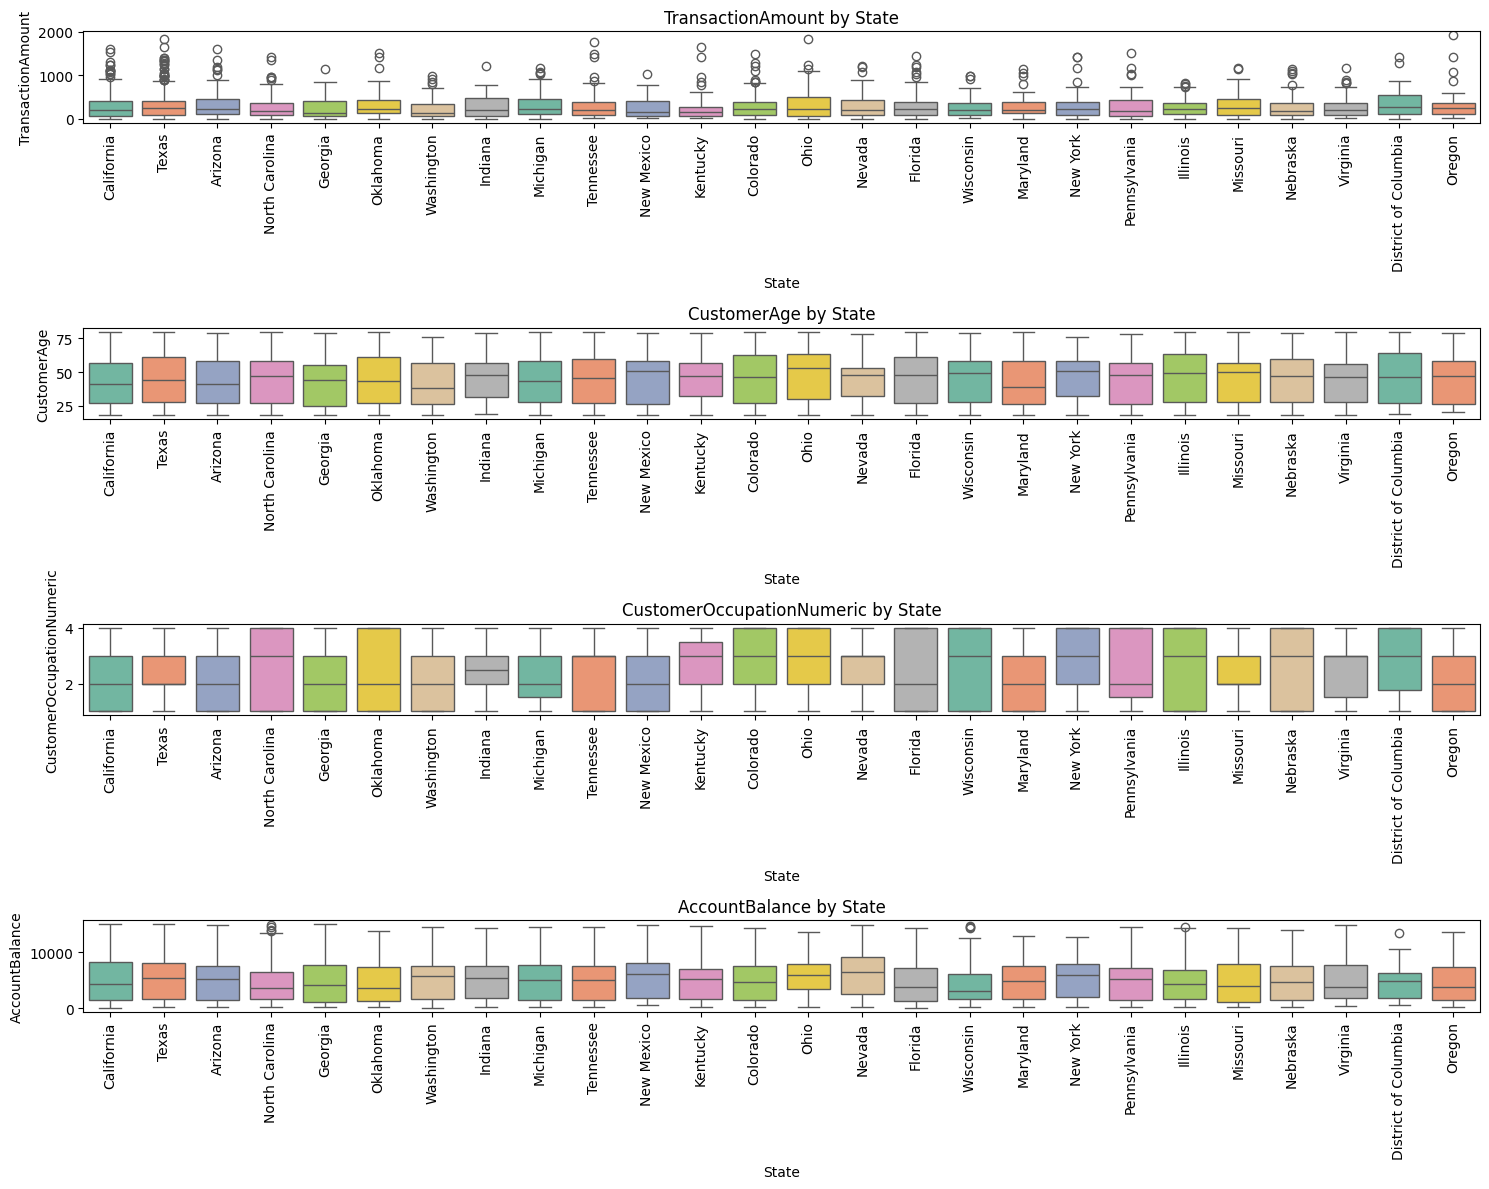

In [ ]:
# Plot boxplots for numeric columns by State
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_bank_filtered.columns[1:]):
    plt.subplot(4, 1, i + 1)
    sns.boxplot(data=df_bank_filtered, x='State', y=col, palette='Set2')
    plt.title(f'{col} by State')
    plt.xticks(rotation=90)
    plt.xlabel('State')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
# Filtered the data
df_house_filtered = df_house_state[['State', 'Price', 'Beds', 'Living Space', 'Median Household Income']]
df_house_filtered

State      Price  Beds  Living Space  Median Household Income
State                                                                         
New York      New York  3999000.0     2          1967                 370046.0
New York      New York  1650000.0     1           718                 249880.0
New York      New York   760000.0     3          1538                 249880.0
New York      New York  1100000.0     1           600                 249880.0
New York      New York   764900.0     1           643                 188289.0
...                ...        ...   ...           ...                      ...
Washington  Washington  2495000.0     4          3380                 205611.0
Washington  Washington  2295000.0     4          2878                 205611.0
Washington  Washington   950000.0     3          1380                 205611.0
Washington  Washington   425000.0     2           856                 205611.0
Washington  Washington  1150000.0     3          2840                 205611.0

[36512 rows x 5 columns]

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a copy of the filtered data
df_house_no_outliers = df_house_filtered.copy()

# Remove outliers for each numeric column
for col in ['Price', 'Beds', 'Living Space', 'Median Household Income']:
    df_house_no_outliers = remove_outliers(df_house_no_outliers, col)

Explores relationships and correlations between variables across states and identifies how variables like price and income interact.

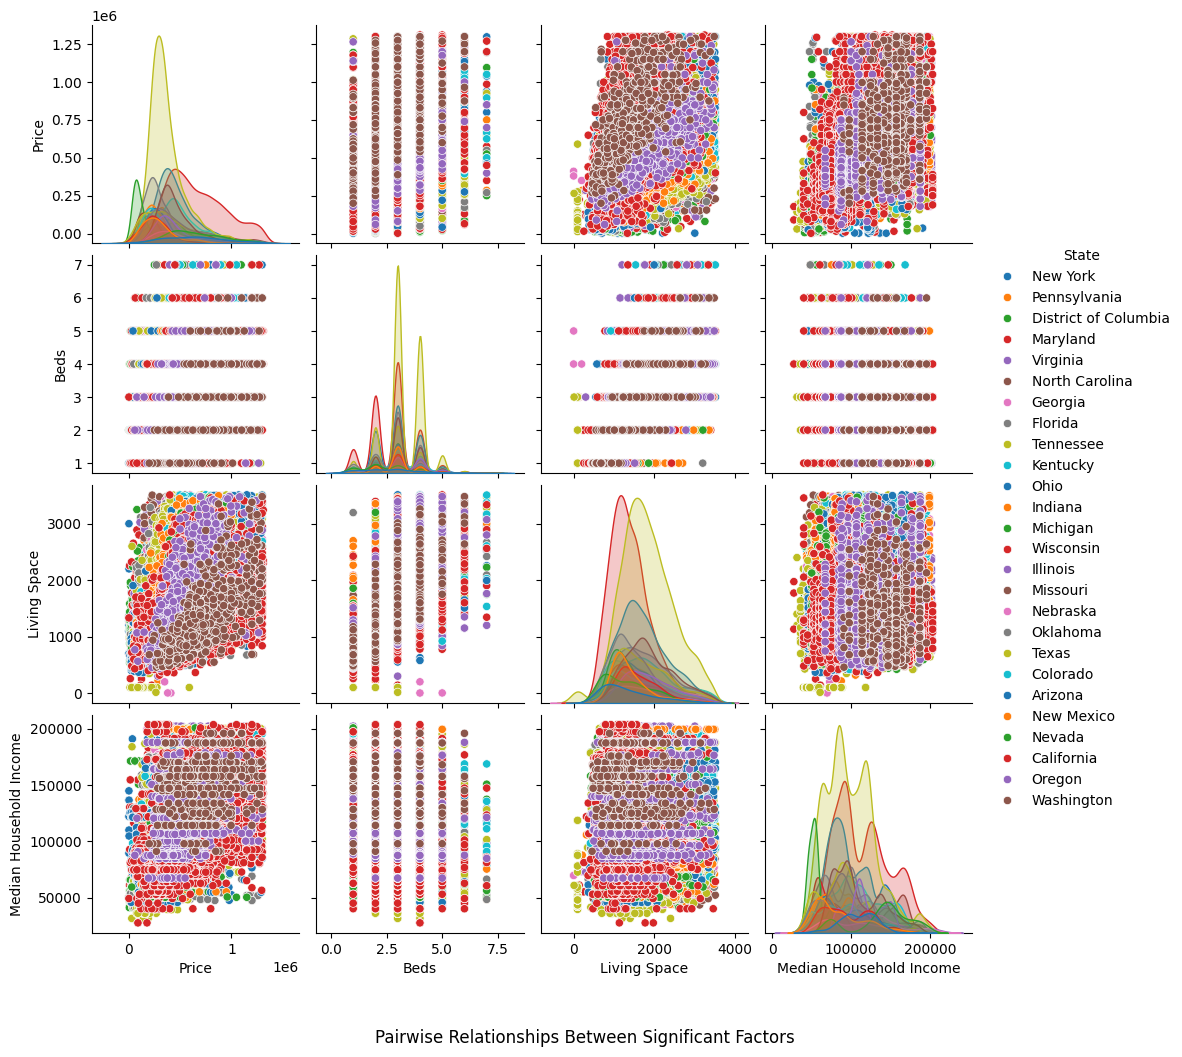

In [ ]:
# Create pairplot
sns.pairplot(df_house_no_outliers, hue='State', palette='tab10', diag_kind='kde')
plt.figtext(0.5, -0.05, 'Pairwise Relationships Between Significant Factors', ha='center', fontsize=12)
plt.show()

Focus on the distribution of individual variables to detect trends or anomalies.

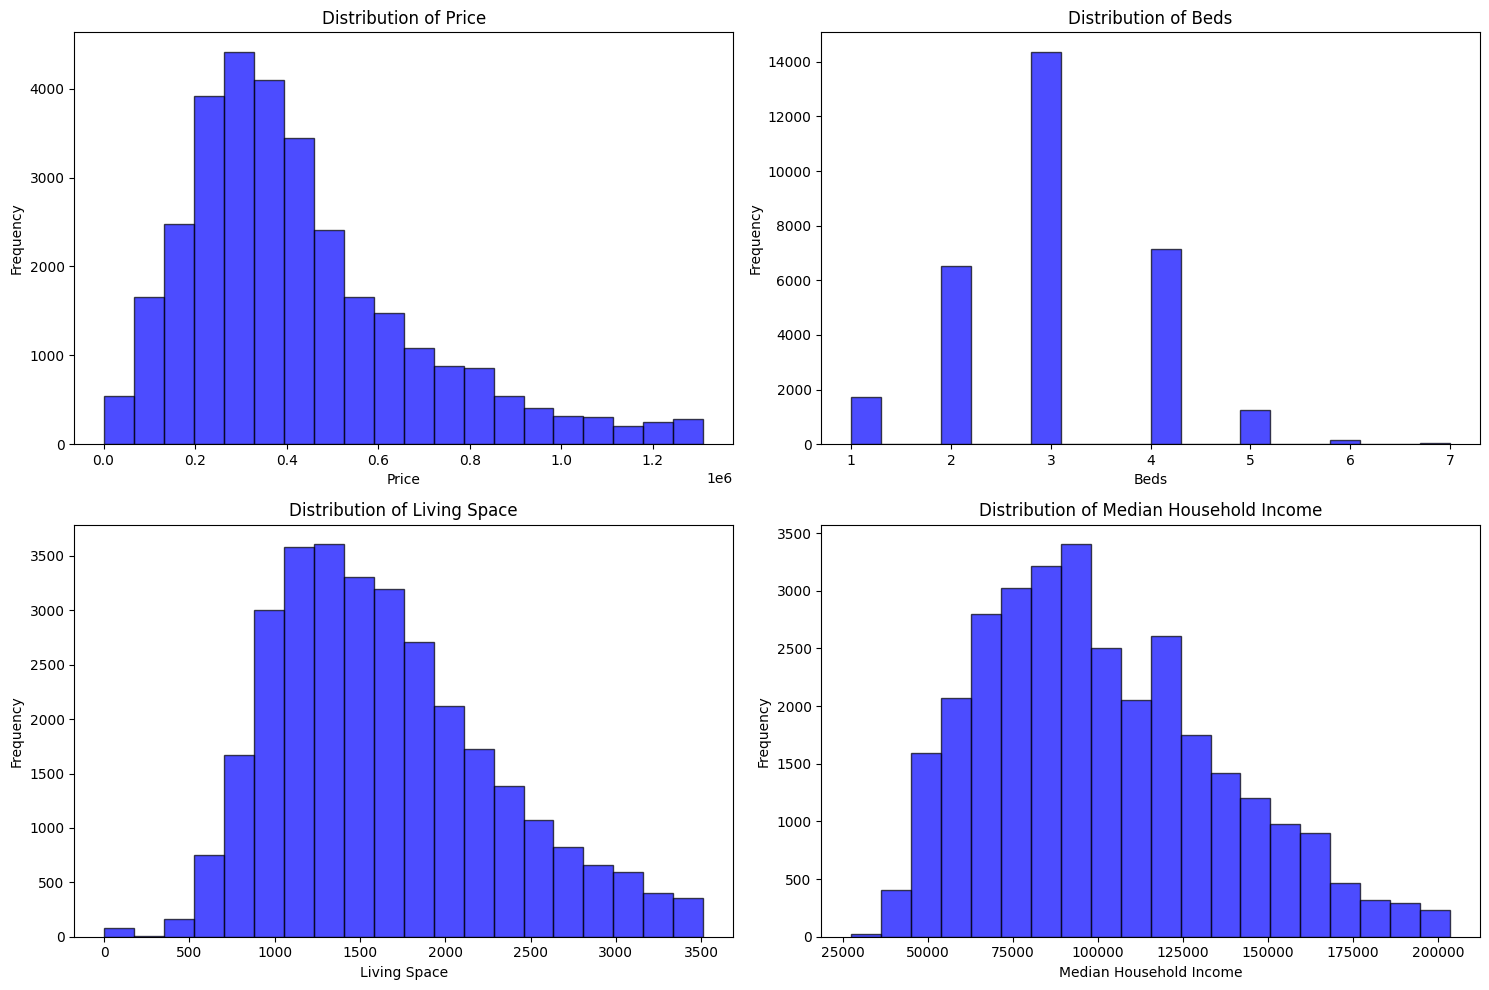

In [ ]:
# Plot histograms for numeric columns
fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(df_house_no_outliers.columns[1:]):  # Skip 'State'
    plt.subplot(2, 2, i + 1)
    plt.hist(df_house_no_outliers[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Highlight state-level differences for each numeric variable and pinpoint outliers.

<ipython-input-26-08bc81e7be86>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_house_no_outliers, x='State', y=col, palette='Set2')
<ipython-input-26-08bc81e7be86>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_house_no_outliers, x='State', y=col, palette='Set2')
<ipython-input-26-08bc81e7be86>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_house_no_outliers, x='State', y=col, palette='Set2')
<ipython-input-26-08bc81e7be86>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

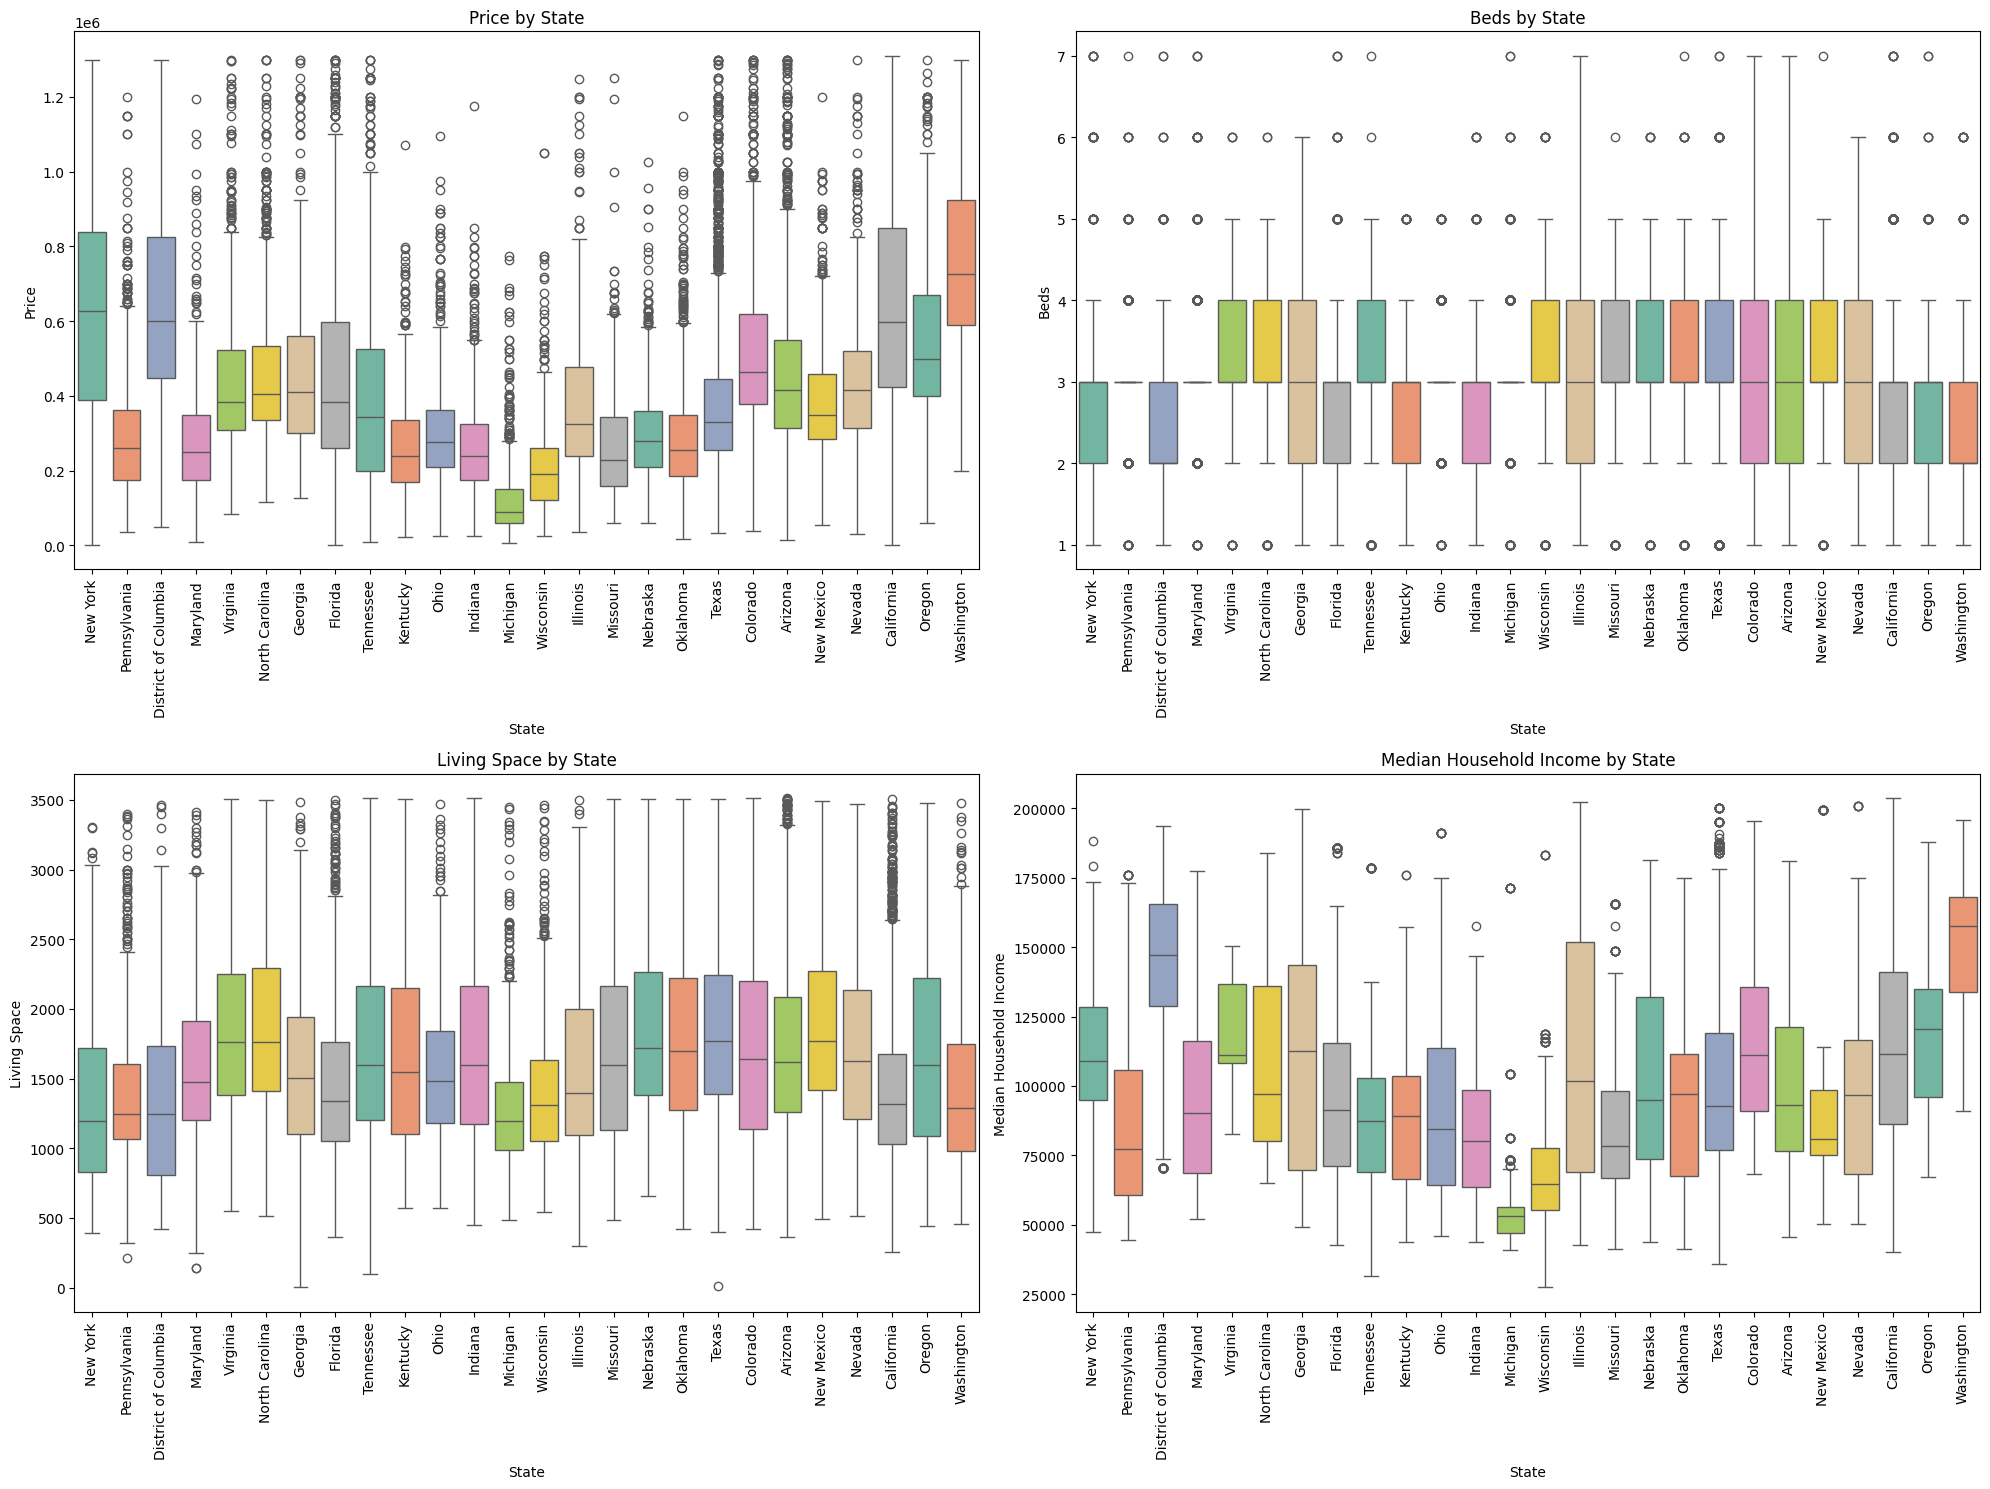

In [ ]:
# Boxplots for each numeric column by State
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_house_no_outliers.columns[1:]):  # Skip 'State'
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df_house_no_outliers, x='State', y=col, palette='Set2')
    plt.title(f'{col} by State')
    plt.xticks(rotation=90)
    plt.xlabel('State')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Identify 3 research questions and perform analysis

The next step is to formulate a clear and meaningful research question. The question should be broad enough to engage the reader’s interest, yet focused enough to be answerable using the available data.

As I develop my research direction, I will generate three distinct questions, each offering a unique type of insight rather than repeating similar patterns (e.g., avoiding three correlation-based questions with only different variables). This will ensure a diverse and well-rounded exploration of the dataset.

### Question 1 : How strongly are Median Household Income and Bank Transactions related across states?


1. Data Preparation, Normalizing, Merging, and Sorting Data

In [ ]:
# Reset index
df_bank_filtered = df_bank_filtered.reset_index(drop=True)

# Ensure no missing values in TransactionAmount
df_bank_filtered = df_bank_filtered.dropna(subset=['TransactionAmount'])

# Average TransactionAmount for each state
bank_state_summary = df_bank_filtered.groupby('State')['TransactionAmount'].mean().reset_index()
bank_state_summary

State  TransactionAmount
0                Arizona         320.699781
1             California         286.364482
2               Colorado         295.134180
3   District of Columbia         351.032083
4                Florida         302.328226
5                Georgia         263.151803
6               Illinois         270.430333
7                Indiana         284.878793
8               Kentucky         264.805882
9               Maryland         297.146275
10              Michigan         327.139048
11              Missouri         307.680328
12              Nebraska         283.143846
13                Nevada         298.696909
14            New Mexico         249.124146
15              New York         304.141897
16        North Carolina         273.894724
17                  Ohio         353.318148
18              Oklahoma         319.353529
19                Oregon         338.621667
20          Pennsylvania         290.586866
21             Tennessee         302.568220
22                 Texas         318.332832
23              Virginia         275.981091
24            Washington         236.722787
25             Wisconsin         277.002545

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize TransactionAmountfor meaningful comparisons
scaler = MinMaxScaler()
bank_state_summary['Normalized_TransactionAmount'] = scaler.fit_transform(bank_state_summary[['TransactionAmount']])
bank_state_summary['Normalized_TransactionAmount']

0     0.720243
1     0.425760
2     0.500975
3     0.980393
4     0.562676
5     0.226673
6     0.289099
7     0.413018
8     0.240859
9     0.518232
10    0.775470
11    0.608579
12    0.398138
13    0.531532
14    0.106362
15    0.578231
16    0.318811
17    1.000000
18    0.708697
19    0.873953
20    0.461974
21    0.564735
22    0.699942
23    0.336706
24    0.000000
25    0.345466
Name: Normalized_TransactionAmount, dtype: float64

In [ ]:
# Reset index
df_house_filtered = df_house_filtered.reset_index(drop=True)

# Ensure no missing values in TransactionAmount
df_house_filtered = df_house_filtered.dropna(subset=['Median Household Income'])

# Average Median Household Income for each state
house_state_summary = df_house_filtered.groupby('State')['Median Household Income'].mean().reset_index()
house_state_summary

State  Median Household Income
0                Arizona            103445.803422
1             California            141052.226072
2               Colorado            118881.527027
3   District of Columbia            155132.073113
4                Florida            100559.423804
5                Georgia            125896.870406
6               Illinois            117643.332136
7                Indiana             85079.100000
8               Kentucky             92555.507378
9               Maryland             96269.682497
10              Michigan             55593.128951
11              Missouri             90657.358726
12              Nebraska            104632.942263
13                Nevada            102703.110849
14            New Mexico             88021.030857
15              New York            113483.865421
16        North Carolina            117220.595805
17                  Ohio             94938.691566
18              Oklahoma             96246.766886
19                Oregon            125225.132075
20          Pennsylvania             85612.845845
21             Tennessee             99860.453475
22                 Texas            109372.308646
23              Virginia            119141.103292
24            Washington            162228.391791
25             Wisconsin             69374.951111

In [ ]:
# Normalize Median Household Income for meaningful comparisons
scaler = MinMaxScaler()
house_state_summary['Normalized_Income'] = scaler.fit_transform(house_state_summary[['Median Household Income']])
house_state_summary['Normalized_Income']

0     0.448751
1     0.801415
2     0.593503
3     0.933452
4     0.421683
5     0.659292
6     0.581892
7     0.276512
8     0.346624
9     0.381455
10    0.000000
11    0.328824
12    0.459884
13    0.441786
14    0.304101
15    0.542885
16    0.577928
17    0.368973
18    0.381240
19    0.652992
20    0.281518
21    0.415128
22    0.504328
23    0.595938
24    1.000000
25    0.129243
Name: Normalized_Income, dtype: float64

In [ ]:
# Merge the two datasets by State for comparative analysis
merged_data = pd.merge(bank_state_summary, house_state_summary, on='State', how='inner')
merged_data.head()

State  TransactionAmount  Normalized_TransactionAmount  \
0               Arizona         320.699781                      0.720243   
1            California         286.364482                      0.425760   
2              Colorado         295.134180                      0.500975   
3  District of Columbia         351.032083                      0.980393   
4               Florida         302.328226                      0.562676   

   Median Household Income  Normalized_Income  
0            103445.803422           0.448751  
1            141052.226072           0.801415  
2            118881.527027           0.593503  
3            155132.073113           0.933452  
4            100559.423804           0.421683

2. Visual Exploration

Visually explored some aspects, and add the following for deeper insights.

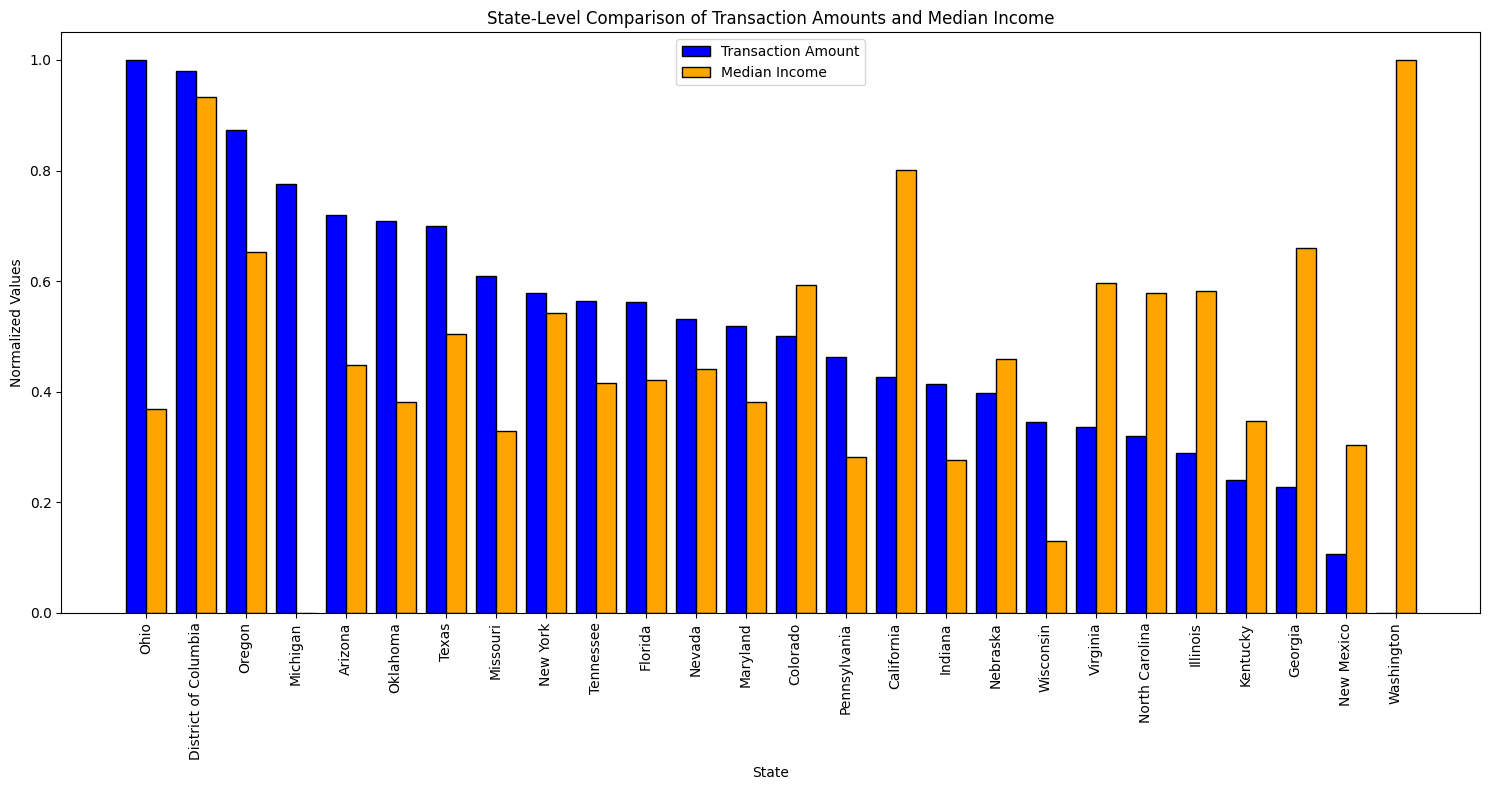

In [ ]:
# Sort data for consistency
merged_data = merged_data.sort_values('Normalized_TransactionAmount', ascending=False)

# Create the figure
plt.figure(figsize=(15, 8))

# Numeric positions for the states
x = np.arange(len(merged_data))

# Plot Transaction Amounts with blue color
plt.bar(x - 0.2, merged_data['Normalized_TransactionAmount'],
        width=0.4, color='blue', edgecolor='black', label='Transaction Amount')

# Plot Median Income with orange color and hatching
plt.bar(x + 0.2, merged_data['Normalized_Income'],
        width=0.4, color='orange', edgecolor='black', label='Median Income')

# Add state labels
plt.xticks(x, merged_data['State'], rotation=90)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Normalized Values')
plt.title('State-Level Comparison of Transaction Amounts and Median Income')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

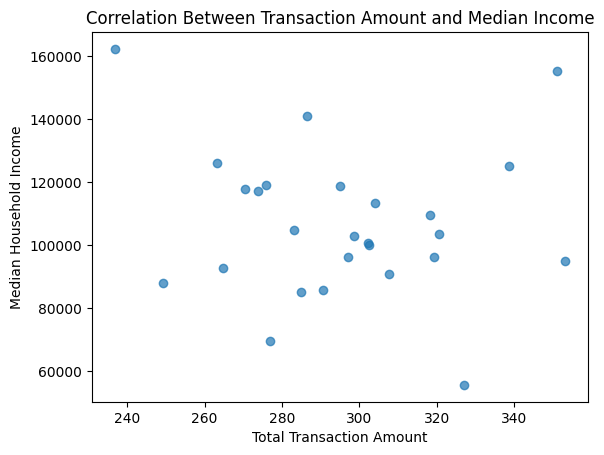

In [ ]:
# Scatter plot for Transaction Amount vs Median Income
plt.scatter(merged_data['TransactionAmount'], merged_data['Median Household Income'], alpha=0.7)
plt.xlabel('Total Transaction Amount')
plt.ylabel('Median Household Income')
plt.title('Correlation Between Transaction Amount and Median Income')
plt.show()

3. Statistical Analysis

Include some statistical insights to deepen the analysis.

In [ ]:
# Correlation Coefficient
correlation = merged_data[['TransactionAmount', 'Median Household Income']].corr()
print('Correlation Coefficient:', correlation)

Correlation Coefficient:                          TransactionAmount  Median Household Income
TransactionAmount                 1.000000                -0.111968
Median Household Income          -0.111968                 1.000000


This result may indicate that TransactionAmount and Median Household Income operate independently rather than being strongly connected.
There could be other factors influencing both variables, or the relationship might not be linear.

In [ ]:
# State Ranking by transaction amounts and income
merged_data['Transaction_Rank'] = merged_data['TransactionAmount'].rank(ascending=False)
merged_data['Income_Rank'] = merged_data['Median Household Income'].rank(ascending=False)
merged_data[['State', 'Transaction_Rank', 'Income_Rank']]

State  Transaction_Rank  Income_Rank
17                  Ohio               1.0         19.0
3   District of Columbia               2.0          2.0
19                Oregon               3.0          5.0
10              Michigan               4.0         26.0
0                Arizona               5.0         13.0
18              Oklahoma               6.0         18.0
22                 Texas               7.0         11.0
11              Missouri               8.0         21.0
15              New York               9.0         10.0
21             Tennessee              10.0         16.0
4                Florida              11.0         15.0
13                Nevada              12.0         14.0
9               Maryland              13.0         17.0
2               Colorado              14.0          7.0
20          Pennsylvania              15.0         23.0
1             California              16.0          3.0
7                Indiana              17.0         24.0
12              Nebraska              18.0         12.0
25             Wisconsin              19.0         25.0
23              Virginia              20.0          6.0
16        North Carolina              21.0          9.0
6               Illinois              22.0          8.0
8               Kentucky              23.0         20.0
5                Georgia              24.0          4.0
14            New Mexico              25.0         22.0
24            Washington              26.0          1.0

#### 4. Findings and Interpretation

1. Overall Spread:

* Transaction Amounts:
	- States like Ohio, District of Columbia, and Oregon rank the highest in transaction activity.
	- States such as New Mexico, Georgia, and Kentucky have the lowest transaction activity.
	- The distribution appears skewed, with a small number of states dominating transaction amounts.

* Household Income:
	- States like District of Columbia, California, and Virginia rank the highest in median household income.
	- States such as Michigan, Wisconsin, and New Mexico are at the lower end of the income spectrum.
	- A few states demonstrate significantly higher incomes, suggesting a long-tailed distribution.

2. Common Trends:

* High Transaction and High Income:
	- The District of Columbia shows both high transaction activity (rank 2) and high median household income (rank 2), indicating a possible alignment between income and transactions in some regions.
	- California also demonstrates relatively high income (rank 3) but moderate transaction activity (rank 16), suggesting other factors might influence spending behavior.
* Low Transaction and Low Income:
	- New Mexico ranks low for both transactions (rank 25) and income (rank 22), indicating a potential correlation in economically weaker states.
* Outliers:
	- Ohio ranks first in transaction activity but ranks low (rank 19) in income. This anomaly could reflect unique economic or spending patterns in Ohio.

3. Relationships:

* Correlation Observation:
	- The weak negative correlation of approximately -0.11 between transaction amounts and income (as seen in the correlation matrix) aligns with the ranking discrepancies.
	- Higher income does not consistently correlate with higher transaction activity across states.
* Regional Influence:
	- Some high-income states (e.g., Virginia, rank 6 in income) have moderate transaction rankings, indicating that income alone may not drive transaction behavior.
	- Lower-income states like Georgia (rank 24 in income) also show low transaction activity (rank 24), suggesting income might play a role in these regions.

### Question 2: How strongly are house prices and account balances related across states?

1. Data Preparation, Normalizing, Merging, and Sorting Data

In [ ]:
# Merge datasets on State
merged_data = pd.merge(df_house_filtered[['State', 'Price']], df_bank_filtered[['State', 'AccountBalance']], on='State', how='inner')

# Display merged data
merged_data.head()

State      Price  AccountBalance
0  New York  3999000.0         9690.15
1  New York  3999000.0          985.06
2  New York  3999000.0          421.93
3  New York  3999000.0         1152.20
4  New York  3999000.0         6863.06

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for regression
X = merged_data[['Price']].values  # House Price as independent variable
y = merged_data['AccountBalance'].values  # Account Balance as dependent variable

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 16133102.669007348
R-squared: 2.9317321719513068e-05


The low R² and high MSE confirm that house price alone does not meaningfully explain account balance.
Therefore, we will analyze state clusters because clustering methods is segment states and investigate whether certain clusters show stronger relationships between house prices and account balances.


2. Visual Exploration
Visually explored some aspects, and add the following for deeper insights.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


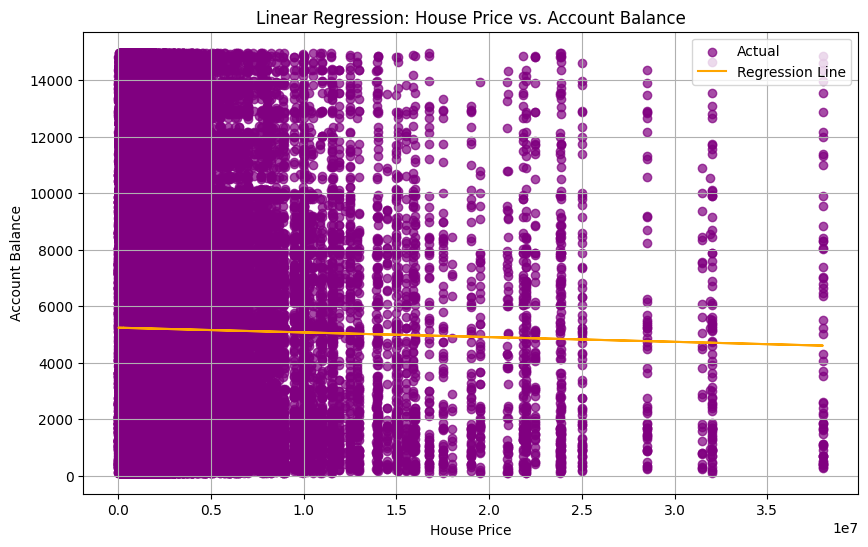

In [ ]:
# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='purple', alpha=0.7, label='Actual')
plt.plot(X_test, y_pred, color='orange', label='Regression Line')
plt.title('Linear Regression: House Price vs. Account Balance')
plt.xlabel('House Price')
plt.ylabel('Account Balance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Combine features for clustering
features = merged_data[['Price', 'AccountBalance']]

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


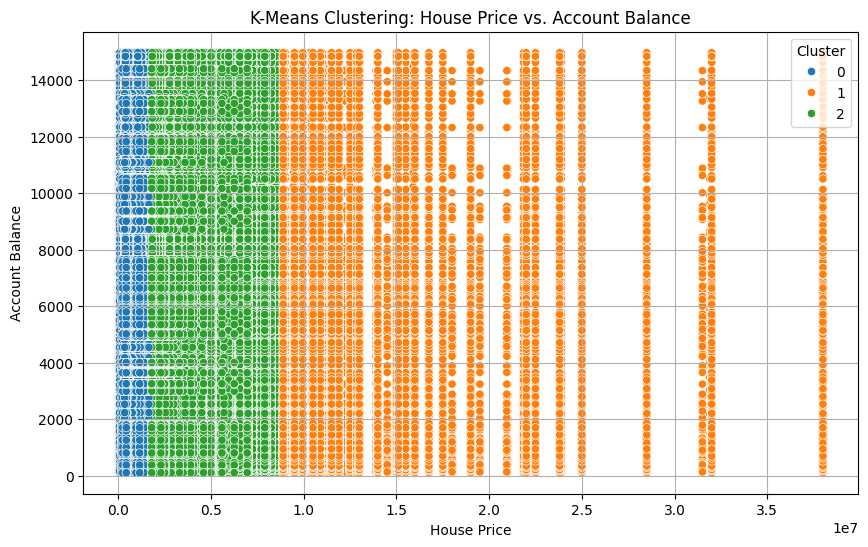

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Price', y='AccountBalance', hue='Cluster', palette='tab10')
plt.title('K-Means Clustering: House Price vs. Account Balance')
plt.xlabel('House Price')
plt.ylabel('Account Balance')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

1. Cluster Observations:
- Cluster 0 (Blue): These points are associated with the lowest house prices and account balances. This suggests states with generally lower economic activity or affordability.
- Cluster 1 (Green): This group represents states with moderate house prices and account balances. It may reflect middle-tier economic states.
- Cluster 2 (Orange): These states show the highest house prices but appear to span a wide range of account balances, indicating variability in financial health despite high housing costs.

2. Relationships:
- The clustering pattern reveals that there isn’t a strong linear relationship between house prices and account balances.
- High house prices (orange) don’t always align with high account balances.
- Low account balances are not strictly tied to low house prices.

3. Data Spread:
- The data is skewed along the x-axis (house prices), with a wider range of house prices compared to account balances.

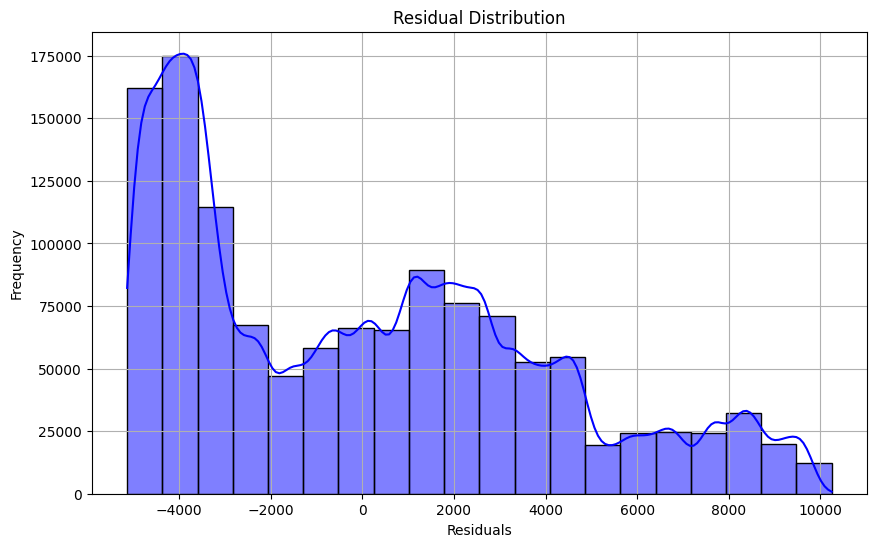

In [ ]:
# Check the quality of the regression model by analyzing residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

 Non-linear models such as decision trees, random forests, or polynomial regression may perform better.

3. Statistical Analysis

Include some statistical insights to deepen the analysis.

In [ ]:
#  Quantify the strength and direction of the relationship between house prices and account balances
correlation = merged_data[['Price', 'AccountBalance']].corr()
correlation

Price  AccountBalance
Price           1.000000       -0.004997
AccountBalance -0.004997        1.000000

The value is -0.004997, which is very close to zero, so this indicates that there is essentially no linear relationship between house prices and account balances.

The correlation result suggests that house prices and account balances are largely independent of each other in this dataset.

In [ ]:
# State Ranking by AccountBalance_Rank and HousePrice_Rank'
merged_data['AccountBalance_Rank'] = merged_data['AccountBalance'].rank(ascending=False)
merged_data['HousePrice_Rank'] = merged_data['Price'].rank(ascending=False)
merged_data[['State', 'AccountBalance_Rank', 'HousePrice_Rank']]

State  AccountBalance_Rank  HousePrice_Rank
0          New York             944280.0          92670.5
1          New York            5329074.0          92670.5
2          New York            5909296.0          92670.5
3          New York            5113827.0          92670.5
4          New York            2152869.0          92670.5
...             ...                  ...              ...
6280994  Washington            6279009.5         976536.5
6280995  Washington            2691961.5         976536.5
6280996  Washington            3036305.5         976536.5
6280997  Washington            4464591.5         976536.5
6280998  Washington             537972.5         976536.5

[6280999 rows x 3 columns]

#### 4. Findings and Interpretation

1. Overall Spread:

* Transaction Amounts:
	- The rankings suggest a wide variability in transaction amounts across states.
	- States like New York and Washington exhibit the highest account balances in the dataset.
	- States with lower-ranked transaction amounts might be associated with less economically active regions or different demographic factors.

* Household Income:
	- Similarly, household income also displays variability, with some states like California and New York having higher income levels, aligning with their cost of living and economic activity.
	- Outliers or extreme values in house prices might be influencing the rankings significantly.

2. Common Trends:

* States like California and New York often dominate both household income and account balance rankings, likely reflecting their affluent demographics and economic activity.
* States with lower transaction activities also generally rank lower in median income, but the relationship is not consistent across all states.

3. Relationships:

* Correlation Analysis:
	- The correlation coefficient (-0.004997) between house prices and account balances indicates no significant linear relationship.
	- Scatterplot visuals reaffirm this, as the data points are widely dispersed without a clear trend.
* K-Means Clustering::
	- Clustering provides a categorical grouping of states, helping to identify patterns based on house prices and account balances.
	- The clusters may point toward specific economic behaviors or demographic influences.

4. Insights:

* Skewness: Higher-ranked states in both income and transaction amounts seem to follow common socio-economic trends, such as urbanization or affluence.
* Weak Correlation: The weak correlation suggests that factors influencing household income and transaction amounts are not linearly related and could involve complex dynamics like housing market variations, savings behavior, or external economic factors.




### Question 3: How does the relationship between age and account balance in each state correlate with the median income of those states?

1. Analyze Bank Transaction Data

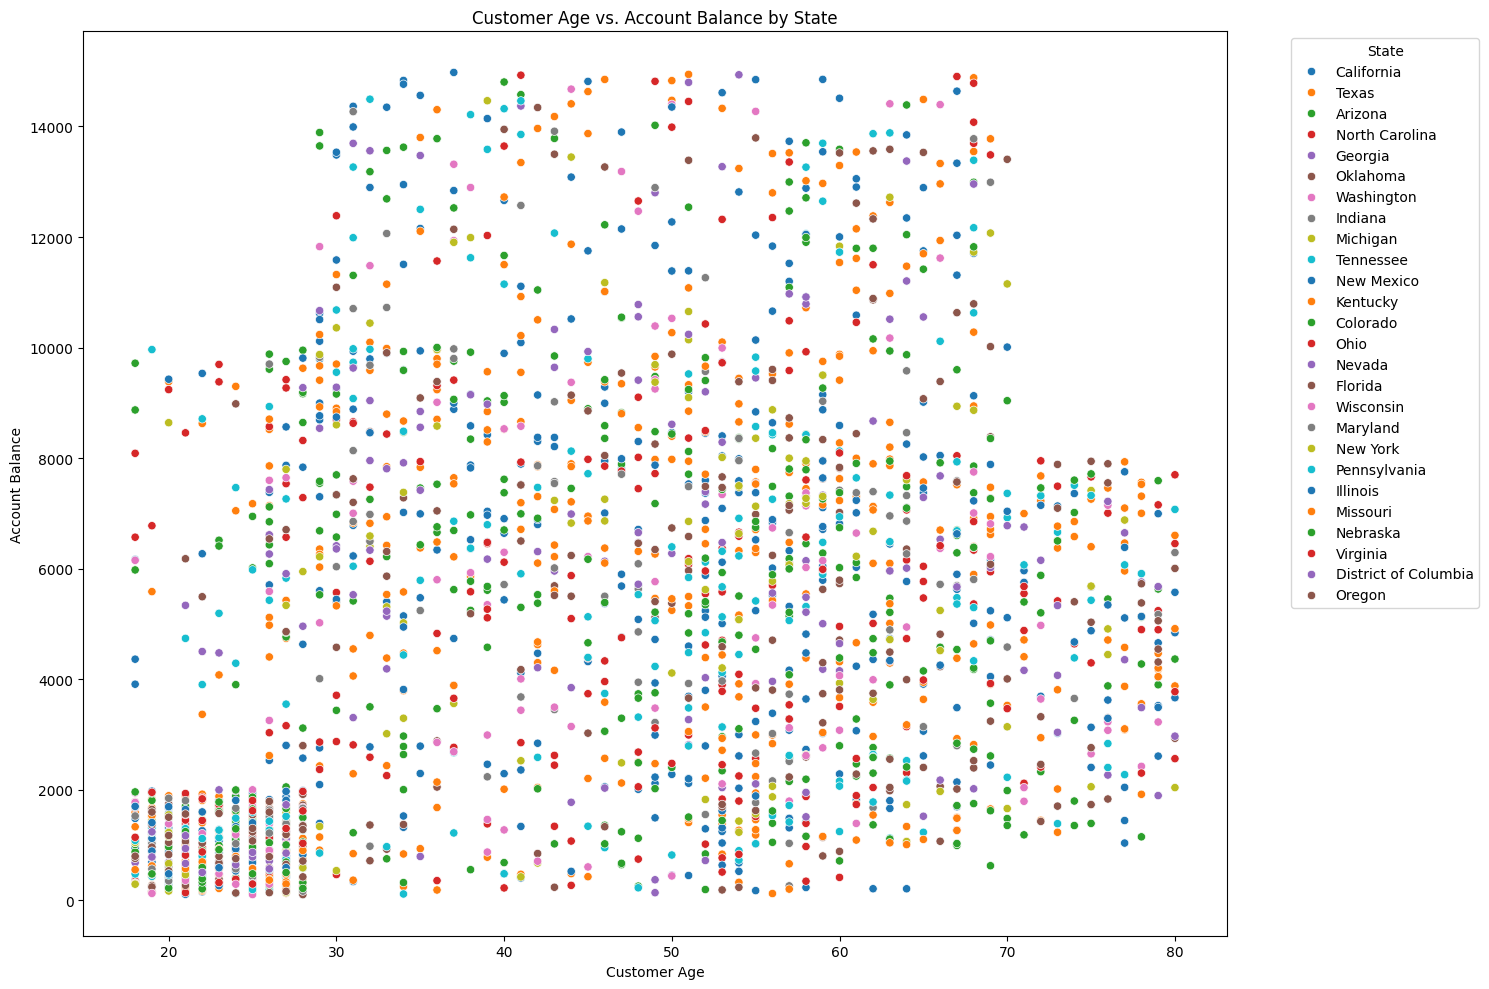

In [ ]:
# Scatter plot for Age vs Account Balance by State
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_bank_filtered, x='CustomerAge', y='AccountBalance', hue='State', palette='tab10')
plt.title('Customer Age vs. Account Balance by State')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- The distribution shows no strong linear trend between customer age and account balance.
- Differences in data spread between states suggest some variation in financial behaviors or demographic characteristics by state.

In [ ]:
# Correlation by State
age_balance_corr = df_bank_filtered.groupby('State').apply(
    lambda df: df['CustomerAge'].corr(df['AccountBalance'])
).reset_index(name='Age_AccountBalance_Correlation')

age_balance_corr

<ipython-input-50-881c2f607ca0>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_balance_corr = df_bank_filtered.groupby('State').apply(


State  Age_AccountBalance_Correlation
0                Arizona                        0.277658
1             California                        0.326249
2               Colorado                        0.166205
3   District of Columbia                        0.297380
4                Florida                        0.502976
5                Georgia                        0.419694
6               Illinois                        0.353917
7                Indiana                        0.244723
8               Kentucky                        0.230644
9               Maryland                        0.467761
10              Michigan                        0.384820
11              Missouri                        0.215116
12              Nebraska                        0.302522
13                Nevada                        0.156914
14            New Mexico                        0.364002
15              New York                        0.272666
16        North Carolina                        0.315142
17                  Ohio                        0.087201
18              Oklahoma                        0.394558
19                Oregon                        0.248291
20          Pennsylvania                        0.096213
21             Tennessee                        0.331718
22                 Texas                        0.385252
23              Virginia                        0.360456
24            Washington                        0.433810
25             Wisconsin                        0.249830

- Correlation values range from low to moderate (e.g., 0.08 for Ohio to 0.50 for Florida).
- States like Florida and Georgia have higher correlations, indicating stronger associations between age and account balance in those states.
- Overall, the correlations are relatively low, suggesting that age is not a strong predictor of account balance across most states.

In [ ]:
# Create age bins
df_bank_filtered['AgeGroup'] = pd.cut(df_bank_filtered['CustomerAge'], bins = [0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])
df_bank_filtered['AgeGroup']

0         65+
1         65+
2         <25
3       35-45
4         65+
        ...  
2446      <25
2447    25-35
2448      <25
2449      <25
2450      <25
Name: AgeGroup, Length: 2451, dtype: category
Categories (6, object): ['<25' < '25-35' < '35-45' < '45-55' < '55-65' < '65+']

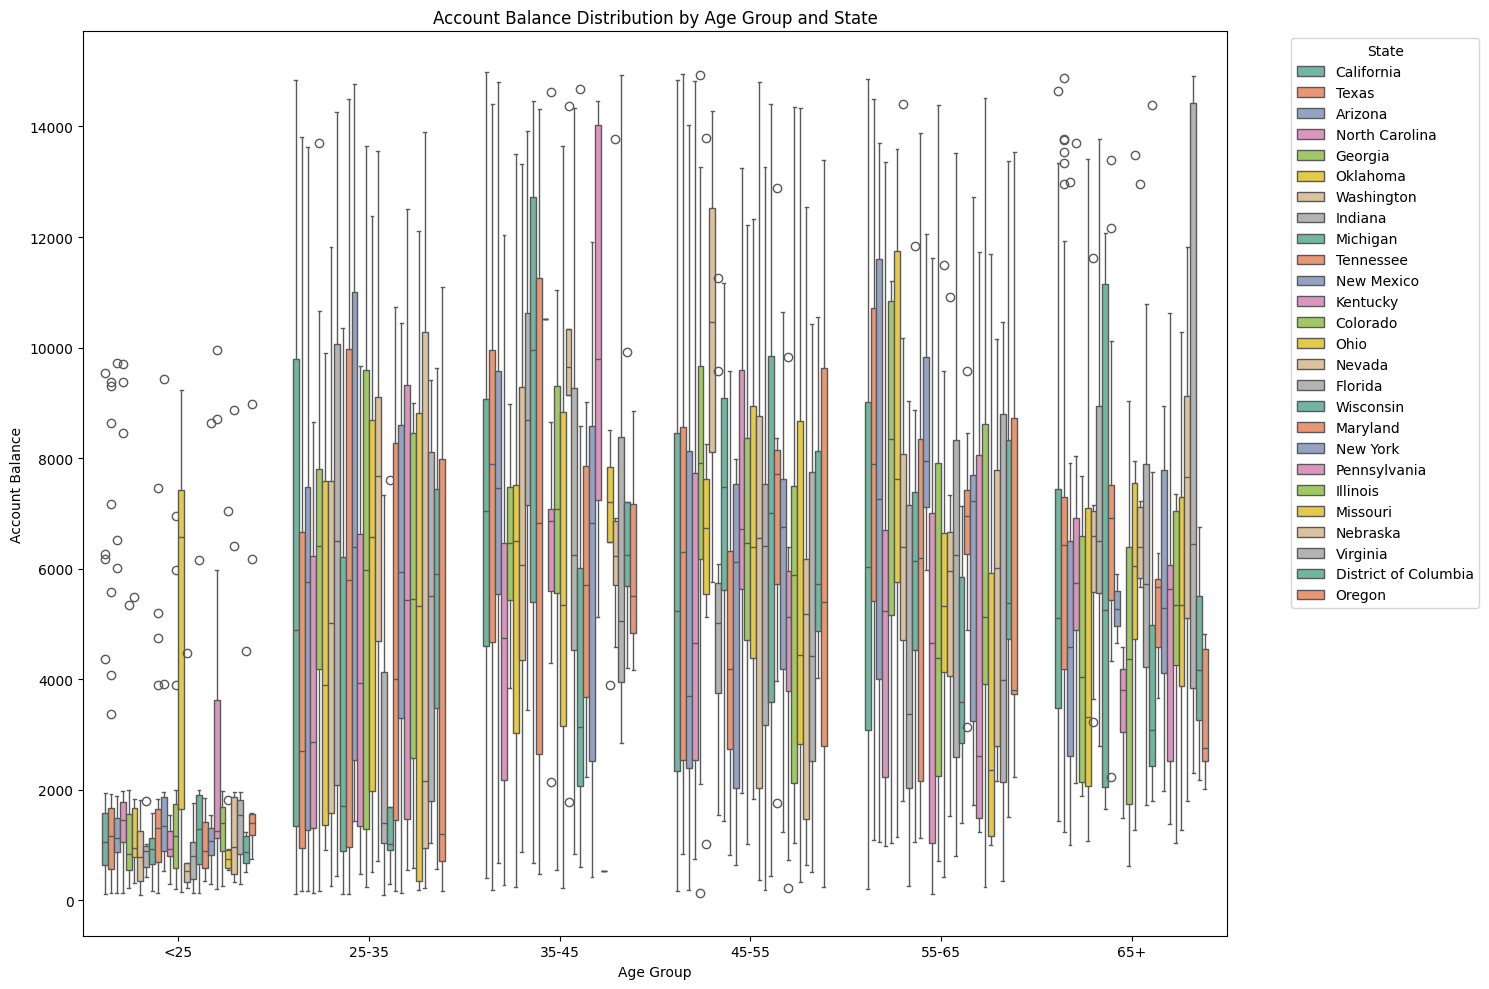

In [ ]:
# Boxplot for bank filtered data
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_bank_filtered, x='AgeGroup', y='AccountBalance', hue='State', palette='Set2')
plt.title('Account Balance Distribution by Age Group and State')
plt.xlabel('Age Group')
plt.ylabel('Account Balance')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Median account balances increase slightly with age in most states.
- Wide variability within age groups indicates factors beyond age influencing account balances.
- Certain states show more variability or higher medians, reflecting differences in economic or demographic factors.

2. Analyze Income Data

In [ ]:
# Filtered data
house_summary = df_house_filtered.groupby('State')['Median Household Income'].mean().reset_index()

<ipython-input-102-141f7a407c29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=house_summary, x='State', y='Median Household Income', palette='coolwarm')


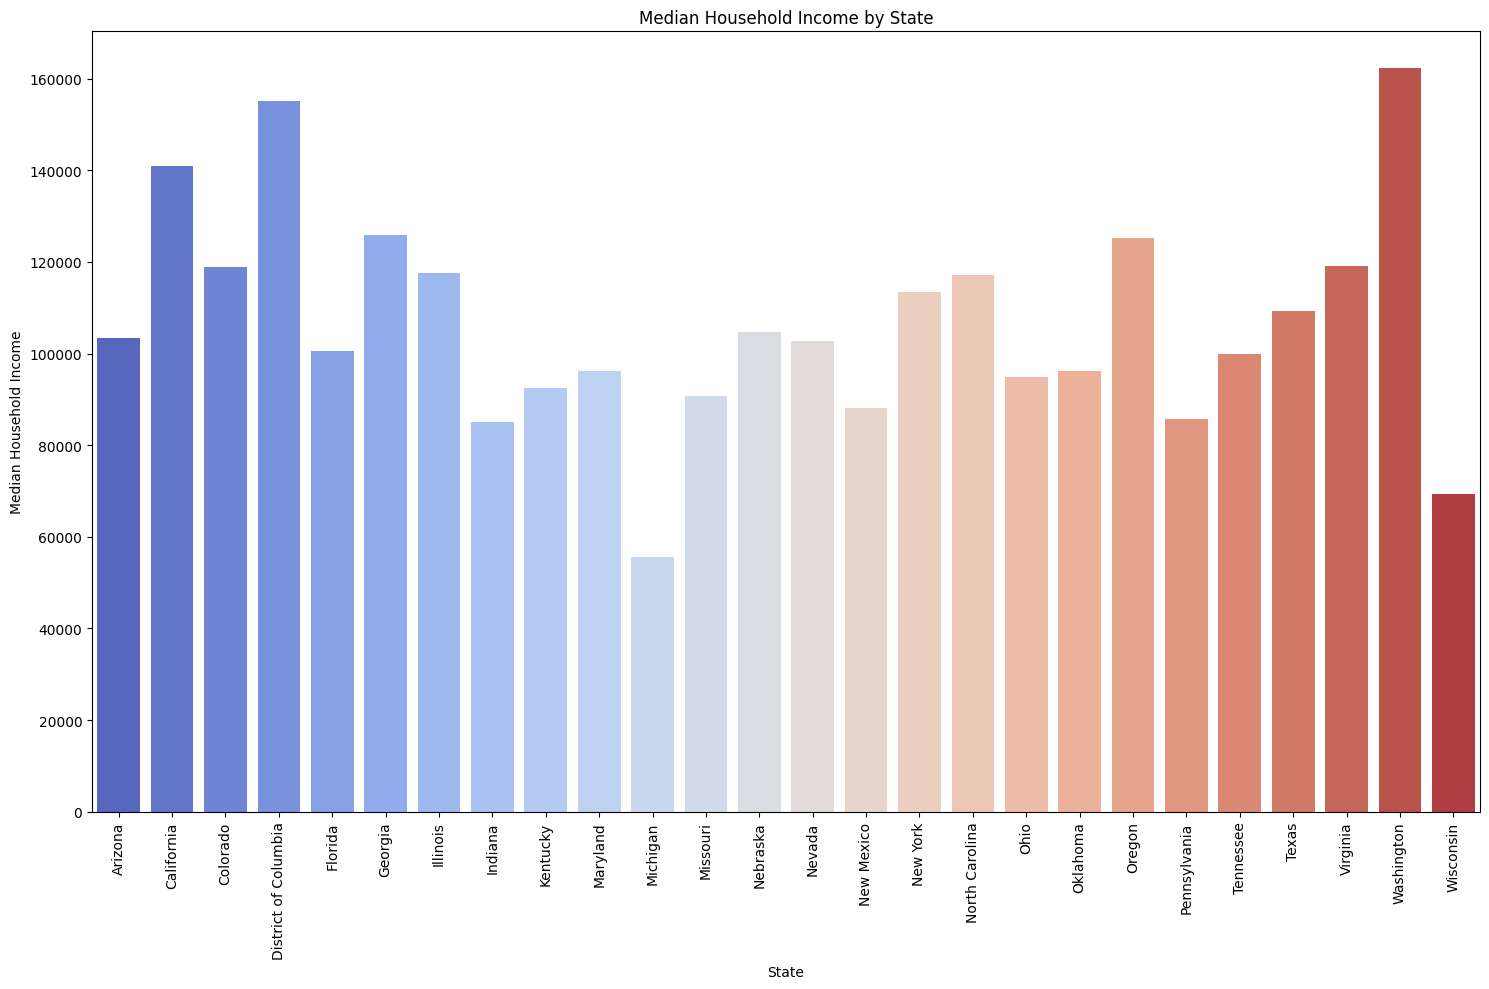

In [ ]:
# Bar plot for averaging income of each state is shown
plt.figure(figsize=(15, 10))
sns.barplot(data=house_summary, x='State', y='Median Household Income', palette='coolwarm')
plt.title('Median Household Income by State')
plt.xlabel('State')
plt.ylabel('Median Household Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- States like California, District of Columbia, and Washington have the highest median incomes.
- The income distribution aligns with economic differences between states.


In [ ]:
# Identify the outlier for Florida
florida_outliers = df_house_filtered[(df_house_filtered['State'] == 'Florida') &
                                     (df_house_filtered['Median Household Income'] > 800000)]
florida_outliers

State      Price  Beds  Living Space  Median Household Income
6893  Florida  5600000.0     3          3550                 900203.0

In [ ]:
# Remove the outlier
df_house_filtered = df_house_filtered[~((df_house_filtered['State'] == 'Florida') &
                                        (df_house_filtered['Median Household Income'] > 800000))]

# Verify the outlier is removed
print(df_house_filtered[df_house_filtered['State'] == 'Florida'])

        State      Price  Beds  Living Space  Median Household Income
6028  Florida   775000.0     5          3697                 183892.0
6029  Florida   594900.0     3          1951                 183892.0
6030  Florida   499900.0     3          1548                 183892.0
6031  Florida   715000.0     4          2511                 183892.0
6032  Florida   115000.0     1           573                  61239.0
...       ...        ...   ...           ...                      ...
7611  Florida   649900.0     3          1408                 109540.0
7612  Florida   795000.0     3          1165                 109540.0
7613  Florida   900000.0     3          1049                 109540.0
7614  Florida  1650000.0     4          2865                 109540.0
7615  Florida   221000.0     1           580                 109540.0

[1587 rows x 5 columns]


<ipython-input-108-136140457509>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_house_filtered, x='State', y='Median Household Income', palette='Set3')


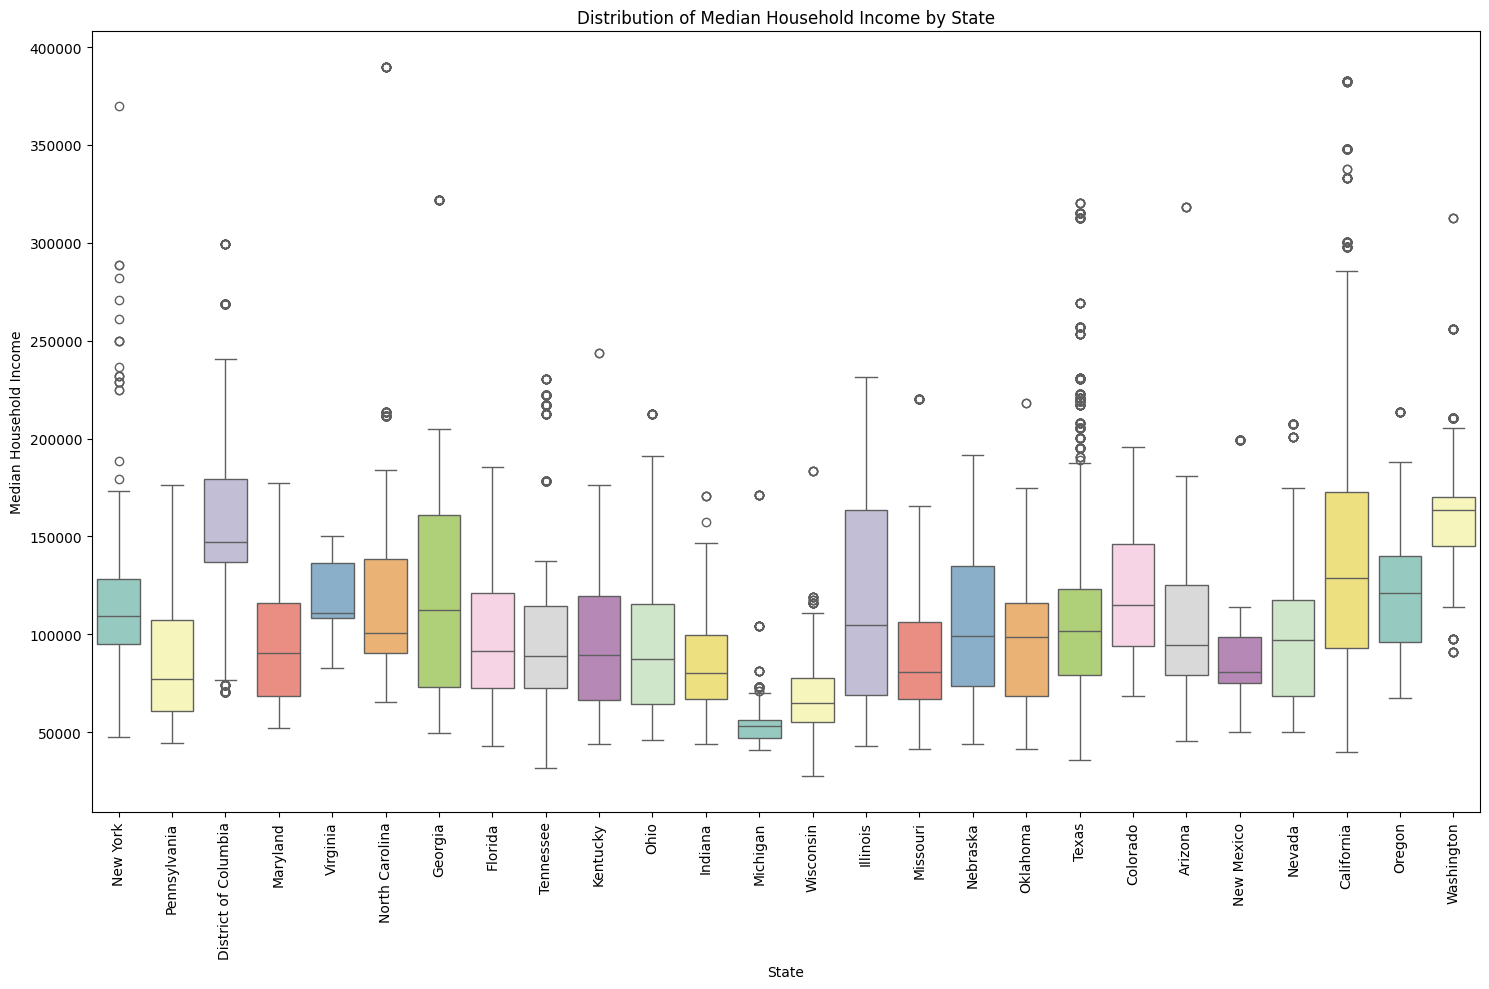

In [ ]:
# Visualize the overall distribution, including median, quartiles, and outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_house_filtered, x='State', y='Median Household Income', palette='Set3')
plt.title('Distribution of Median Household Income by State')
plt.xlabel('State')
plt.ylabel('Median Household Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Significant outliers in a few states (e.g., New York and California) suggest high-income households influencing the distribution.
- States with narrower interquartile ranges have less variability in household incomes.

3. Compare Account Balance and Income

In [ ]:
# Merging data
combined_data = pd.merge(
    df_bank_filtered.groupby('State')[['AccountBalance']].mean().reset_index(),
    df_house_filtered.groupby('State')[['Median Household Income']].mean().reset_index(),
    on='State'
)

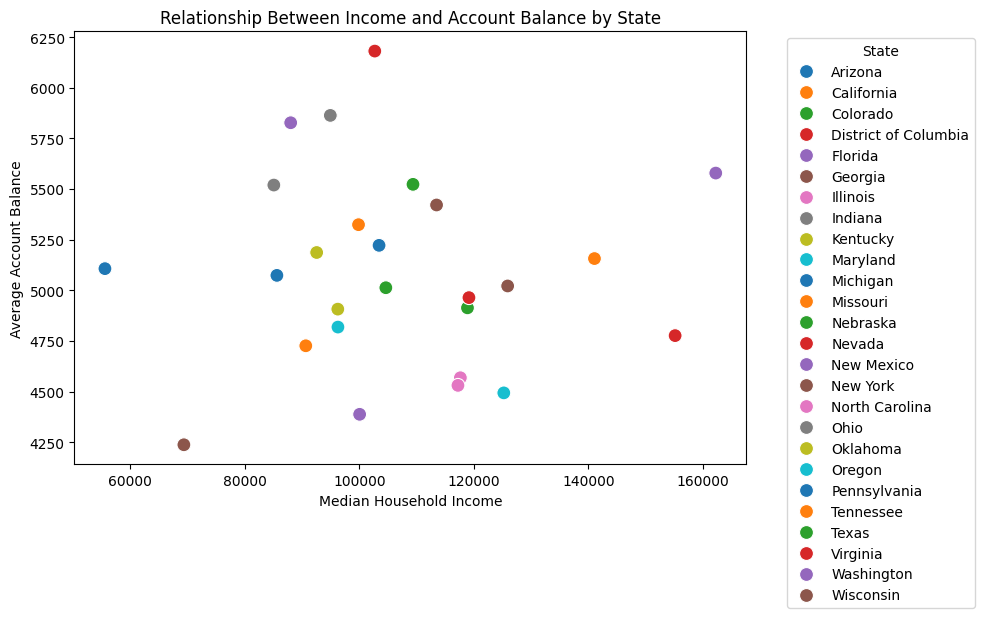

In [ ]:
# Relationship between income and account balance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='Median Household Income', y='AccountBalance', hue='State', palette='tab10', s=100)
plt.title('Relationship Between Income and Account Balance by State')
plt.xlabel('Median Household Income')
plt.ylabel('Average Account Balance')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- No clear trend between income and account balance.
- States with higher incomes do not consistently show higher account balances, indicating other factors at play.

In [ ]:
# Bin ages into groups
df_bank_filtered['AgeGroup'] = pd.cut(df_bank_filtered['CustomerAge'], bins = [0, 25, 35, 45, 55, 65, 100],
                                    labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Aggregate AccountBalance by AgeGroup and State
age_balance_summary = df_bank_filtered.groupby(['State', 'AgeGroup'])['AccountBalance'].mean().unstack()

# Aggregate Income by State
house_summary = df_house_filtered.groupby('State')['Median Household Income'].median()

print(age_balance_summary)
print(house_summary)

AgeGroup                      <25        25-35         35-45         45-55  \
State                                                                        
Arizona               1617.041212  5020.866500   7806.663846   5119.686250   
California            1303.802267  5561.990714   7271.376596   6037.322063   
Colorado              1644.178182  5800.562000   6974.742500   6275.162692   
District of Columbia  1255.384444  5378.044545   6653.745000   6766.520000   
Florida                791.285600  2540.359545   7170.788182   5706.019375   
Georgia               1226.175789  6269.453333   6441.375000   7812.522143   
Illinois              1258.918462  4972.766154    522.080000   6023.485000   
Indiana                898.945000  6562.458000   8854.963750   5281.776667   
Kentucky               959.868000  4161.700000   6990.656667   7434.150000   
Maryland              1002.140000  4690.326000   5700.232000   7161.188571   
Michigan               916.872222  3527.899412   8761.711429   6

<ipython-input-112-d5607d1025cc>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_balance_summary = df_bank_filtered.groupby(['State', 'AgeGroup'])['AccountBalance'].mean().unstack()


In [ ]:
# Merge the summaries
combined_summary = age_balance_summary.copy()
combined_summary

AgeGroup                      <25        25-35         35-45         45-55  \
State                                                                        
Arizona               1617.041212  5020.866500   7806.663846   5119.686250   
California            1303.802267  5561.990714   7271.376596   6037.322063   
Colorado              1644.178182  5800.562000   6974.742500   6275.162692   
District of Columbia  1255.384444  5378.044545   6653.745000   6766.520000   
Florida                791.285600  2540.359545   7170.788182   5706.019375   
Georgia               1226.175789  6269.453333   6441.375000   7812.522143   
Illinois              1258.918462  4972.766154    522.080000   6023.485000   
Indiana                898.945000  6562.458000   8854.963750   5281.776667   
Kentucky               959.868000  4161.700000   6990.656667   7434.150000   
Maryland              1002.140000  4690.326000   5700.232000   7161.188571   
Michigan               916.872222  3527.899412   8761.711429   6857.207778   
Missouri              1447.191000  5039.772727   6786.796000   5716.535263   
Nebraska              1982.206154  5238.494167   7234.456667   4865.540000   
Nevada                1246.020000  6931.298750   9051.936000   5832.389375   
New Mexico            2271.208000  7243.436250  10517.470000   4801.656667   
New York              1903.588750  5645.173333   6050.654000   6135.180625   
North Carolina        2210.525600  3719.302000   4660.900625   5673.817857   
Ohio                  4876.594286  5736.793333   6146.241250   6736.601667   
Oklahoma              1377.865625  4633.787500   6410.318889   6837.638571   
Oregon                2532.652000  3971.205000   6175.686667   6265.975714   
Pennsylvania          2791.577857  5556.749091  10279.434286   4743.145333   
Tennessee             1790.321364  5581.170000   6886.075000   4635.398750   
Texas                 1702.482542  4148.801667   7655.263878   6238.239787   
Virginia              1276.448182  5114.433000   6822.688333   4998.735000   
Washington             877.976667  5040.371538   6803.539286  10247.150000   
Wisconsin             1659.547000  2298.684000   4560.563636   7021.712000   

AgeGroup                    55-65          65+  
State                                           
Arizona               7326.888571  4763.744800  
California            6427.562063  5813.134103  
Colorado              5322.523529  4395.710800  
District of Columbia  6372.388000  4377.790909  
Florida               5964.751724  5963.468571  
Georgia               7544.827500  4438.691429  
Illinois              6386.856250  5320.963077  
Indiana               4340.559167  7625.467500  
Kentucky              4978.525000  3414.145000  
Maryland              6747.847778  5199.166000  
Michigan              6092.415833  6371.220000  
Missouri              4225.631000  5594.225000  
Nebraska              5733.072353  7132.400000  
Nevada                5691.590000  7399.855000  
New Mexico            8542.103636  5277.115000  
New York              6217.237500  5669.980000  
North Carolina        5287.387500  5917.988889  
Ohio                  5530.618333  6241.075000  
Oklahoma              8042.577273  4768.410000  
Oregon                5842.086667  3330.824000  
Pennsylvania          4636.185000  5025.009000  
Tennessee             6423.195000  7074.464118  
Texas                 8008.545263  6241.640484  
Virginia              5240.848571  8601.842857  
Washington            6933.116250  6504.518750  
Wisconsin             4225.831000  4701.745556

In [ ]:
# Normalize the data for comparison
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(
    scaler.fit_transform(combined_summary.fillna(0)),  # Fill NaN values with 0 for normalization
    columns=combined_summary.columns,
    index=combined_summary.index)
normalized_data

AgeGroup                   <25     25-35     35-45     45-55     55-65  \
State                                                                    
Arizona               0.202128  0.550519  0.728794  0.086299  0.718470   
California            0.125454  0.659954  0.675241  0.249819  0.510123   
Colorado              0.208771  0.708201  0.645564  0.292202  0.254118   
District of Columbia  0.113602  0.622753  0.613449  0.379760  0.497341   
Florida               0.000000  0.048875  0.665177  0.190782  0.402903   
Georgia               0.106452  0.803027  0.592203  0.566155  0.768960   
Illinois              0.114467  0.540792  0.000000  0.247353  0.500692   
Indiana               0.026353  0.862283  0.833673  0.115183  0.026625   
Kentucky              0.041266  0.376766  0.647156  0.498730  0.174423   
Maryland              0.051613  0.483673  0.518054  0.450089  0.584324   
Michigan              0.030741  0.248590  0.824343  0.395921  0.432479   
Missouri              0.160552  0.554343  0.626761  0.192656  0.000000   
Nebraska              0.291513  0.594531  0.671547  0.041011  0.349230   
Nevada                0.111310  0.936875  0.853379  0.213301  0.339620   
New Mexico            0.362255  1.000000  1.000000  0.029627  1.000000   
New York              0.272269  0.676776  0.553112  0.267257  0.461397   
North Carolina        0.347401  0.287298  0.414073  0.185044  0.245978   
Ohio                  1.000000  0.695305  0.562676  0.374429  0.302327   
Oklahoma              0.143583  0.472239  0.589095  0.392434  0.884274   
Oregon                0.426251  0.338242  0.565621  0.290565  0.374485   
Pennsylvania          0.489631  0.658893  0.976185  0.019200  0.095113   
Tennessee             0.244544  0.663832  0.636693  0.000000  0.509111   
Texas                 0.223042  0.374158  0.713647  0.285622  0.876390   
Virginia              0.118758  0.569442  0.630351  0.064746  0.235196   
Washington            0.021220  0.554464  0.628436  1.000000  0.627245   
Wisconsin             0.212533  0.000000  0.404035  0.425235  0.000046   

AgeGroup                   65+  
State                           
Arizona               0.271849  
California            0.470936  
Colorado              0.202027  
District of Columbia  0.198627  
Florida               0.499456  
Georgia               0.210181  
Illinois              0.377563  
Indiana               0.814765  
Kentucky              0.015807  
Maryland              0.354456  
Michigan              0.576814  
Missouri              0.429405  
Nebraska              0.721222  
Nevada                0.771963  
New Mexico            0.369244  
New York              0.443777  
North Carolina        0.490828  
Ohio                  0.552123  
Oklahoma              0.272734  
Oregon                0.000000  
Pennsylvania          0.321415  
Tennessee             0.710231  
Texas                 0.552230  
Virginia              1.000000  
Washington            0.602103  
Wisconsin             0.260087

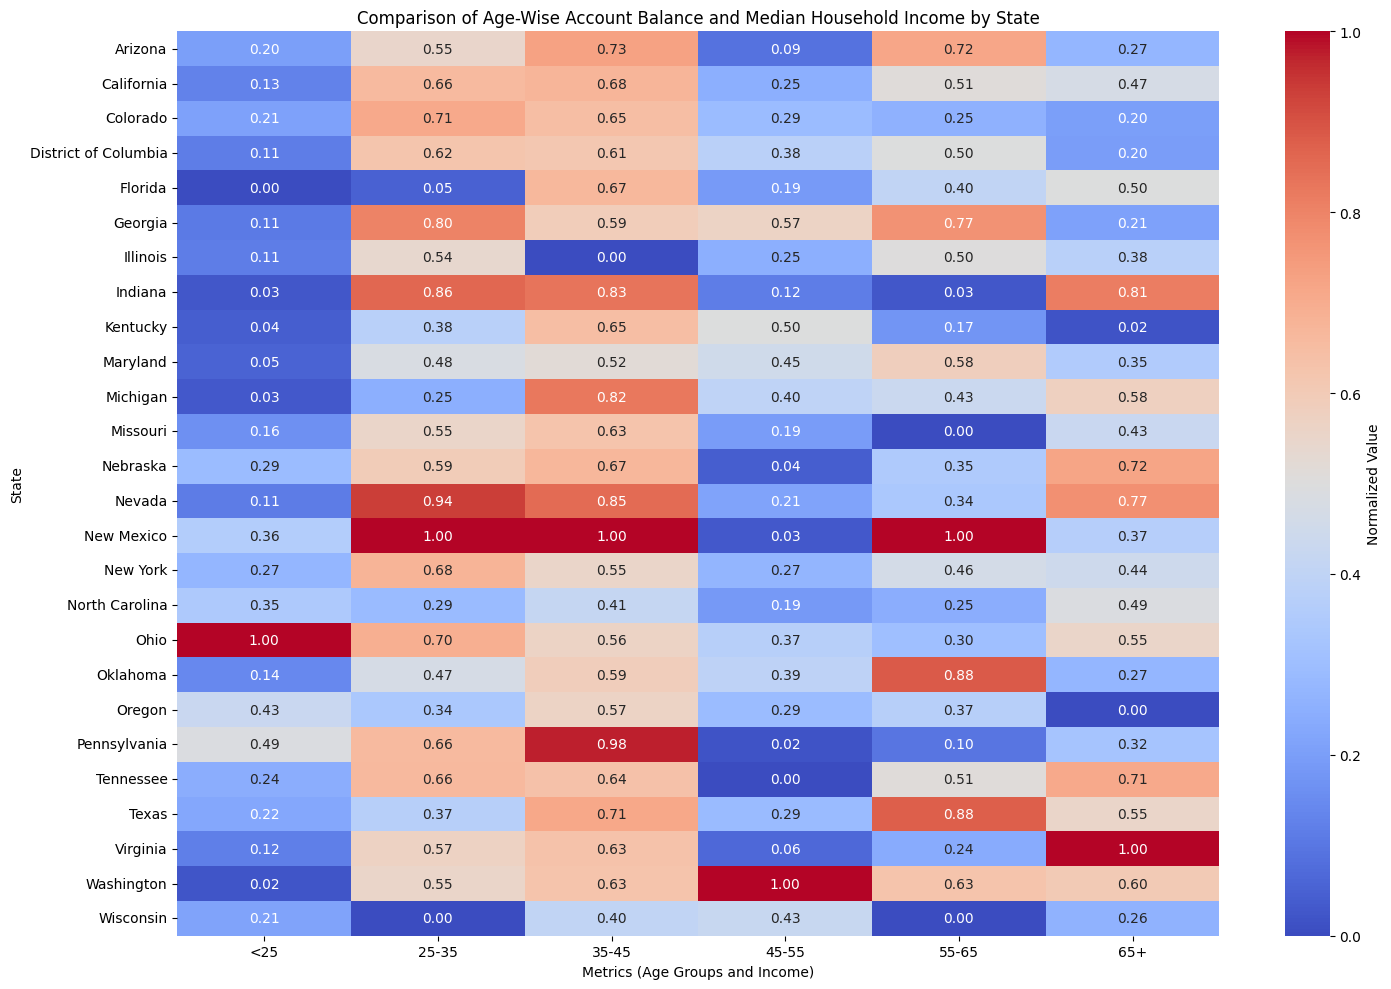

In [ ]:
# Create the Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    normalized_data,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar_kws={'label': 'Normalized Value'}
)
plt.title('Comparison of Age-Wise Account Balance and Median Household Income by State')
plt.xlabel('Metrics (Age Groups and Income)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

- States like Nevada and Ohio show distinct patterns, with one metric significantly higher than the other.
- Normalized values highlight variations in age-group financial behaviors relative to state-level incomes.

4. Statistical Analysis

* Age vs. Account Balance:
    - While age has some correlation with account balance in certain states, it is not a consistent predictor nationwide.
	- States with higher correlations (e.g., Florida, Georgia) could benefit from targeted financial services tailored to age demographics.
* Income vs. Account Balance:
	- The weak relationship between income and account balance suggests that higher household income does not necessarily translate to higher savings or account balances.
	- This could be due to differences in cost of living, spending habits, or financial planning behaviors.
* State-Level Insights:
	- States like California and District of Columbia show high incomes but moderate account balances, pointing to high living costs affecting savings.
	- States with lower incomes but higher balances (e.g., Florida) may indicate different economic priorities or lower costs of living.


#### 5. Findings and Interpretation

1. Overall Spread and Skewness:

* The transaction amounts and household incomes show a wide variation across states. Some states have consistently higher median household incomes, such as California, District of Columbia, and Washington, while others, like Mississippi or West Virginia, tend to have lower household incomes.
* Skewness and Anomalies:
	- States with large outliers in household income (e.g., New York, California) reflect the presence of extremely high-income households in otherwise diverse economic landscapes.
	- Similarly, transaction amounts show variability, with a few states dominating in overall activity.

2. Common Trends:

* High Transaction Activity:
- States like California, Texas, and New York exhibit higher transaction amounts, likely due to larger populations, higher economic activity, and urbanization.
* Low Transaction Activity:
	- Less economically active or smaller states, such as Nebraska and Wyoming, have lower transaction amounts.
* High Household Incomes:
	- States like District of Columbia, California, and Virginia lead in household incomes, reflecting higher living standards and economic opportunities in these regions.
* Low Household Incomes:
	- States like West Virginia and Mississippi tend to have lower household incomes, highlighting economic disparities.

3. Correlation Between Income and Transactions:

* The correlation coefficient between household incomes and transaction amounts is weak to negligible, as shown by the value close to zero.
* Key Observations:
	- High household income does not necessarily lead to high transaction activity. For example, states like District of Columbia have high incomes but show relatively moderate transaction activity.
	- Some states with moderate incomes, such as Florida, show significant transaction activity, possibly driven by different spending behaviors or economic factors like tourism.

4. Relationships:
* No Strong Correlation:
	- The scatter plot between household income and transaction amounts does not reveal a clear linear relationship.
	- The variability in account balances across states is influenced more by state-level cost of living, saving habits, and other socio-economic factors rather than income alone.
* Anomalies:
	- Some states, like Florida, exhibit higher account balances despite lower incomes, suggesting differences in regional spending or saving patterns.


### Present my findings

In this step, I will begin to report my findings based on the data analysis. I will summarize what I have learned and explain how these insights help address my research question.

I will follow best practices from the mini-project to ensure that the report is clear, well-structured, and visually effective, with key points and explanations clearly highlighted.

Finally, I will discuss any limitations in the analysis, such as geographic or demographic constraints or assumptions made during interpretation. These will be documented to provide context and transparency around the conclusions drawn from the data.

## Shown the graphs, interpretations, and insight analysis for each question in the previous step.

#### Question 1: How strongly are Median Household Income and Bank Transactions related across states?

* Analysis:

    - A correlation matrix was calculated to determine the strength of the relationship between transaction amounts and median household incomes.

    - Visualizations, including scatter plots and bar charts, illustrated the distribution of these metrics across states.

* Key Results:

    - The correlation coefficient between median household income and transaction amounts was approximately -0.11, indicating a very weak negative correlation.

    - States like Ohio and District of Columbia ranked high in transaction amounts but showed varying income levels. Conversely, states like New Mexico and Kentucky ranked low in both metrics, suggesting possible regional trends.

    - The scatterplot further emphasized the weak and inconsistent relationship between the two metrics.

#### Conclusion:
The findings suggest no significant relationship between household income and transaction amounts. Factors such as regional spending habits or cost of living may play a more significant role than income in influencing transaction activity.

#### Question 2: How strongly are house prices and account balances related across states?

* Analysis:

    - Linear regression was applied to assess the relationship between house prices and account balances, with scatter plots and K-Means clustering used to identify patterns.

* Key Results:

    - The regression analysis yielded an R-squared value of 0.00003, highlighting no meaningful linear relationship between house prices and account balances.

    - K-Means clustering grouped states into clusters based on house prices and account balances, revealing no clear grouping patterns aligning with high or low values of either metric.

    - States like California and New York exhibited high house prices but did not necessarily show higher account balances.

#### Conclusion:
The analysis indicates that house prices and account balances are not directly related. This could reflect differences in regional savings behavior, housing affordability, or economic conditions.

#### Question 3: How does the relationship between age and account balance in each state correlate with the median income of those states?

* Analysis:

    - Correlation coefficients were calculated for the relationship between age and account balance in each state.

    - Boxplots and scatter plots visualized account balance distributions by age group and state, while heatmaps compared age-wise account balance distributions to median household incomes.

* Key Results:

    - The correlation between age and account balance varied across states, with states like Florida showing a relatively strong positive correlation (0.50), reflecting older populations with higher account balances.

    - A heatmap revealed no consistent alignment between age-wise account balances and median incomes across states.

    - States like Virginia and California exhibited high incomes but moderate correlations between age and account balance.

#### Conclusion:
The relationship between age and account balance is influenced by state-specific factors, such as retirement populations or income distributions, rather than a direct correlation with median income.

#### Insights

* Regional Spending Patterns:

    - Transaction activity and account balances are influenced more by state-level economic behaviors than by household income or house prices.

    - States with higher incomes do not necessarily exhibit higher transaction activity or account balances.

* Weak Correlations:

    - Across all three research questions, the correlations between financial and housing metrics were weak or inconsistent, highlighting the complexity of state-level economic dynamics.

* Clustering Insights:

    - Clustering analysis provided a categorical understanding of state-level behaviors but did not reveal strong patterns aligning with income or house prices.

In [ ]:
from math import pi

# Function to create radar charts
def create_radar_chart(data, title, categories):
    # Number of variables
    num_vars = len(categories)

    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Close the circle

    # Initialize radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # First dataset values
    values = data.tolist()
    values += values[:1]  # Close the circle

    # Draw the outline and fill the area
    ax.fill(angles, values, color='skyblue', alpha=0.4)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Add labels
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add title
    ax.set_title(title, size=15, color='blue', y=1.1)

    plt.show()

In [ ]:
# Merge datasets on 'State'
df_merged = pd.merge(
    df_bank_filtered[['State', 'TransactionAmount', 'AccountBalance', 'CustomerAge']],
    df_house_filtered[['State', 'Price', 'Median Household Income', 'Living Space']],
    on='State')

In [ ]:
# Age groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
df_merged['AgeGroup'] = pd.cut(df_merged['CustomerAge'], bins=bins, labels=labels)

In [ ]:
# Calculate averages for each column grouped by state
state_averages = df_merged.groupby('State').agg({
    'TransactionAmount': 'mean',
    'AccountBalance': 'mean',
    'CustomerAge': 'mean',
    'Price': 'mean',
    'Median Household Income': 'mean',
    'Living Space': 'mean'
}).reset_index()

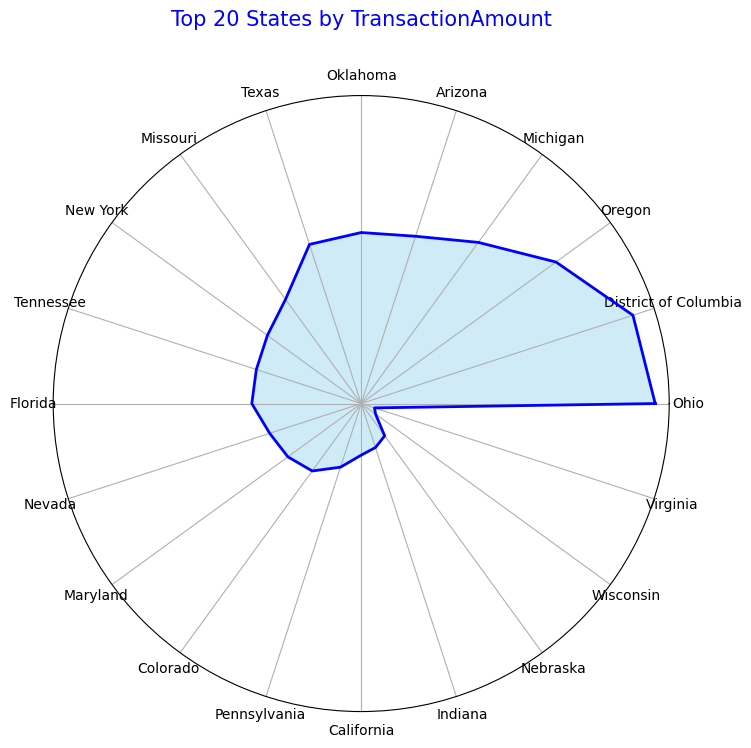

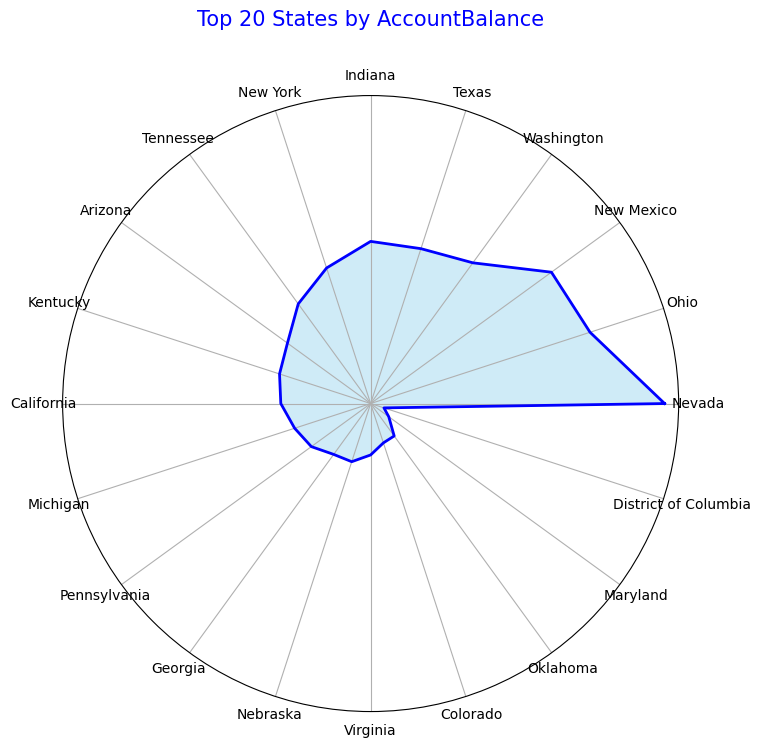

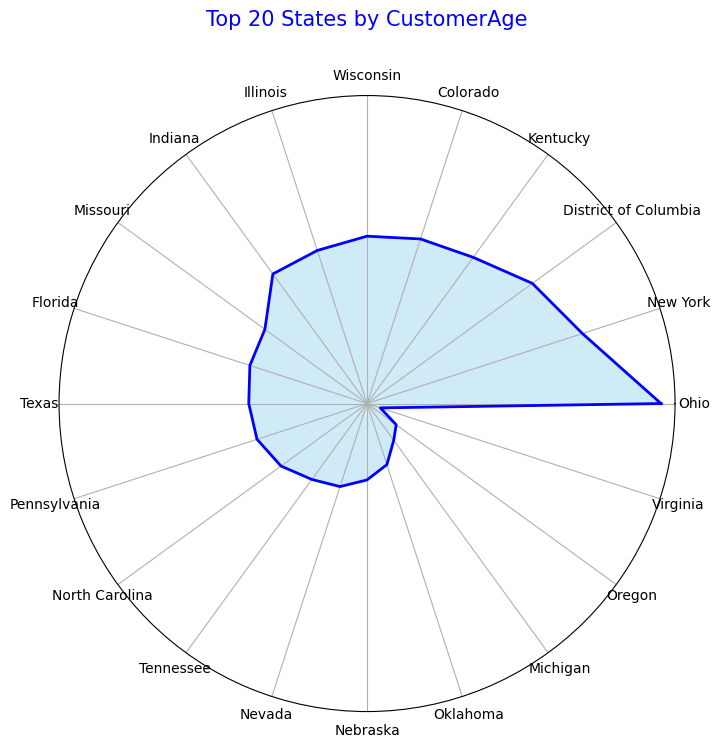

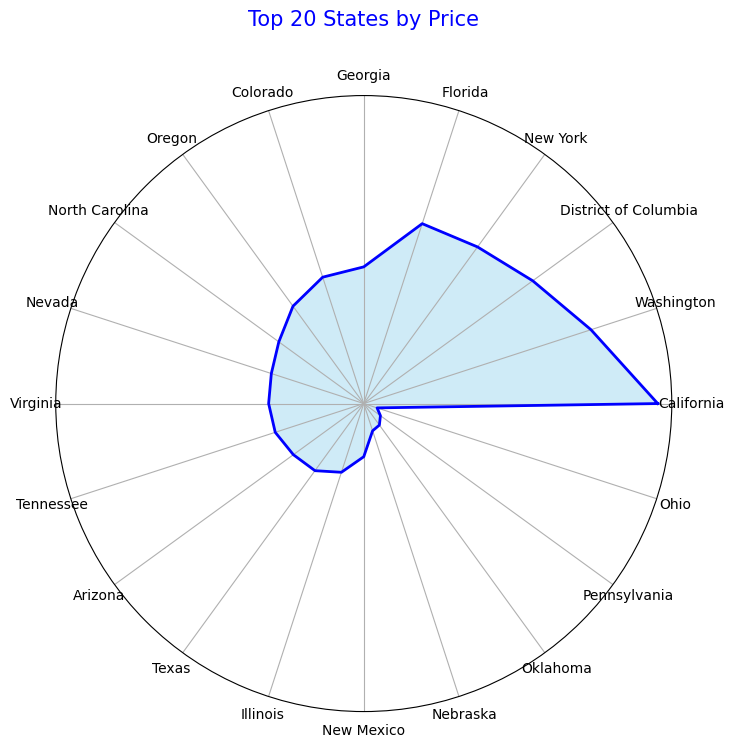

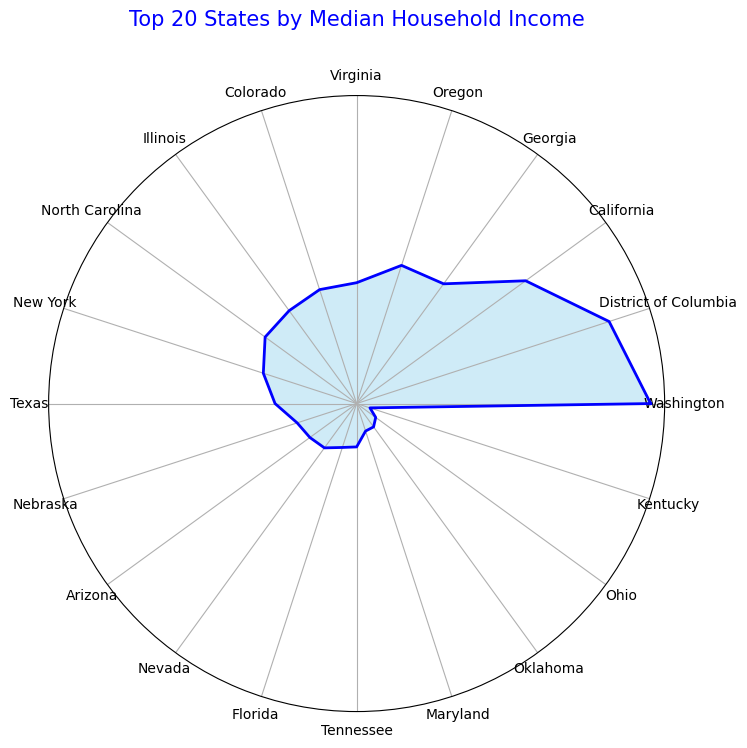

In [ ]:
# Create radar charts for top 20 states for each column
columns_to_plot = ['TransactionAmount', 'AccountBalance', 'CustomerAge',
                   'Price', 'Median Household Income', 'Living Space']

for column in columns_to_plot:
    top_states = state_averages.nlargest(20, column)

    # Prepare data for radar chart
    data = top_states[column].values
    categories = top_states['State'].values

    create_radar_chart(
        data,
        title=f"Top 20 States by {column}",
        categories=categories
    )

#### Conclusion: Before this study, it was generally assumed that higher age groups would correlate with higher income and account balances, and that homeowners in these groups would own properties with higher house prices. Additionally, it was expected that differences between states—due to factors like tax policies, local industries, and population size—would clearly emerge. However, through this analysis, it became evident that there are no strong relationships between key variables such as house price, income, age, bank transactions, and account balance across states.